<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on **one of two separate issues: high school education outcomes, or drug abuse in the community.**

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a **lobbyist-funded fact-finding trip in the Bahamas.(like whut!?)** In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to **look for useful patterns and possible hypotheses!**

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```


**First we load the data 
**We try to understand the scale of data we are working with, and to check for integrity of the data**



In [2]:

with open('./sat_scores.csv') as f:
    clean1=list(csv.reader(f))

clean1

satdict={}

for i,header in enumerate(clean1[0]):
    valuelist=[]
    for row in clean1[1:]:
        valuelist.append(row[i])
    satdict[header] = valuelist

pprint(satdict)
    

{'Math': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['82',
          '81',
          '79',
          '77',
          '72',
          '71',
          '71',
   

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# # Converting dictionary to a dataframe    
satdictdf=pd.DataFrame.from_dict(satdict)
satdictdf.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [4]:
satscore = pd.read_csv('./sat_scores.csv')
satscore.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


First of all, it is **much** faster and convenient to load from file.  
`pd.read_csv` also allows the dataframe to recognize numerical columns correctly, as integers' 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
satscore.head(10)


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501



#### I would assume the States represented are American States, with Rate depicting the pass rate.
#### The verbal and math scores would be the state-averages, out of a maximum of 800 for each segment

In [6]:
# Popping off the last row, which is an average for all states, as it will add noise to our data. 
# Makes sense, there's only 50 states in US.

satscore = satscore[:-1]
satscore.tail()


,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
pprint(satscore.info())

print('The shape of the data is:', satscore.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
State     51 non-null object
Rate      51 non-null int64
Verbal    51 non-null int64
Math      51 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None
The shape of the data is: (51, 4)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

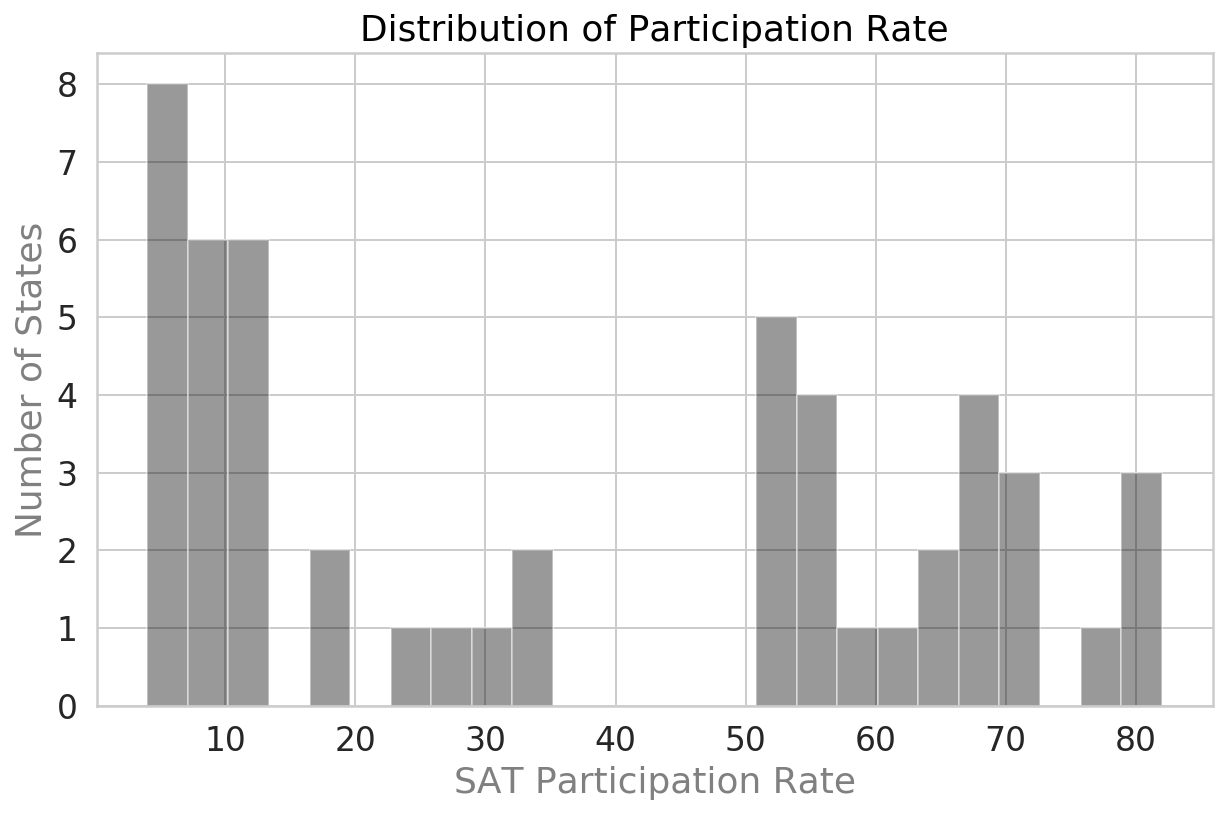

In [8]:
sns.set(rc={'figure.figsize':(10,6)},style='whitegrid',font_scale=1.5)
sns.distplot(satscore['Rate'],kde=False,color='black',bins=25,).set_title('Distribution of Participation Rate',color='Black')
plt.ylabel('Number of States',rotation=90,color='gray')
plt.xlabel('SAT Participation Rate',rotation=0,color='gray');


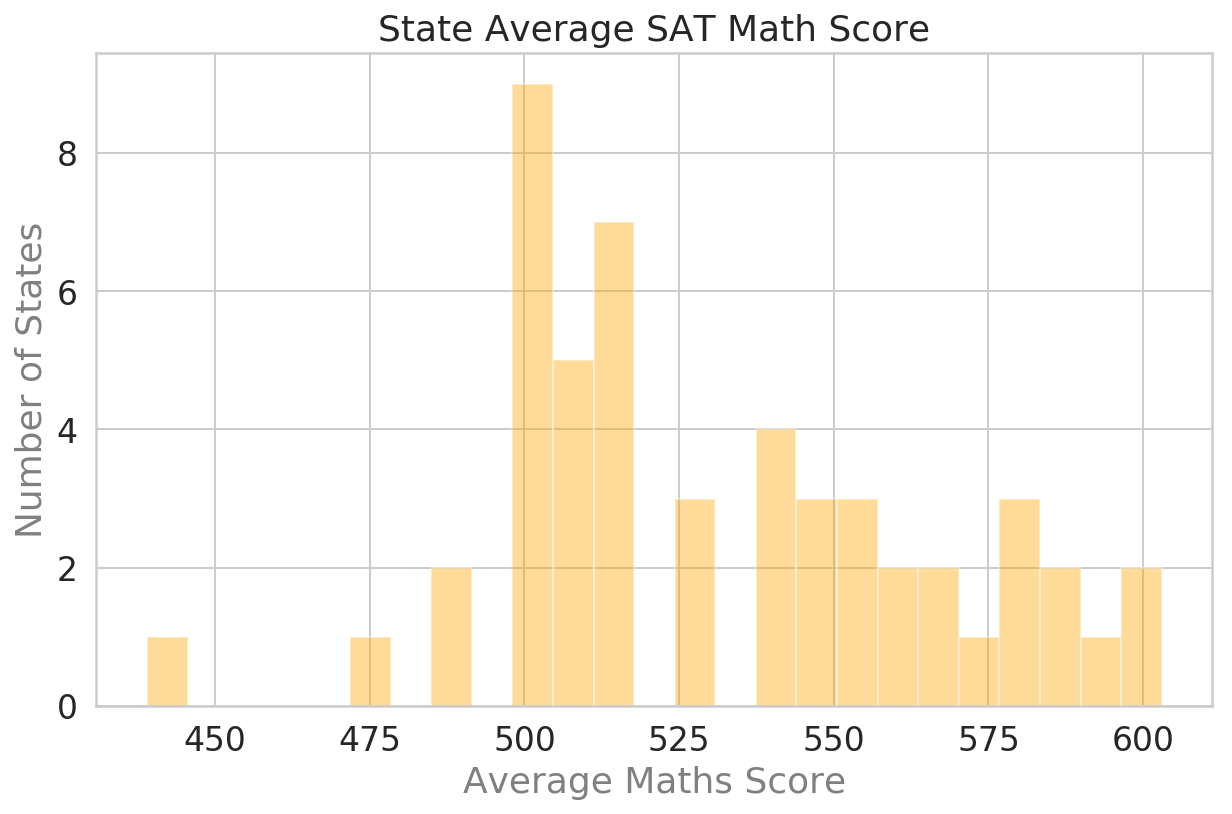

In [9]:
# plt.gca().set_xlim([0,800]); -> sets x axis limits but the graph becomes unusable

sns.distplot(satscore['Math'],kde=False,color='Orange',bins=25,).set_title('State Average SAT Math Score')
plt.ylabel('Number of States',rotation=90,color='gray')
plt.xlabel('Average Maths Score',rotation=0,color='gray');


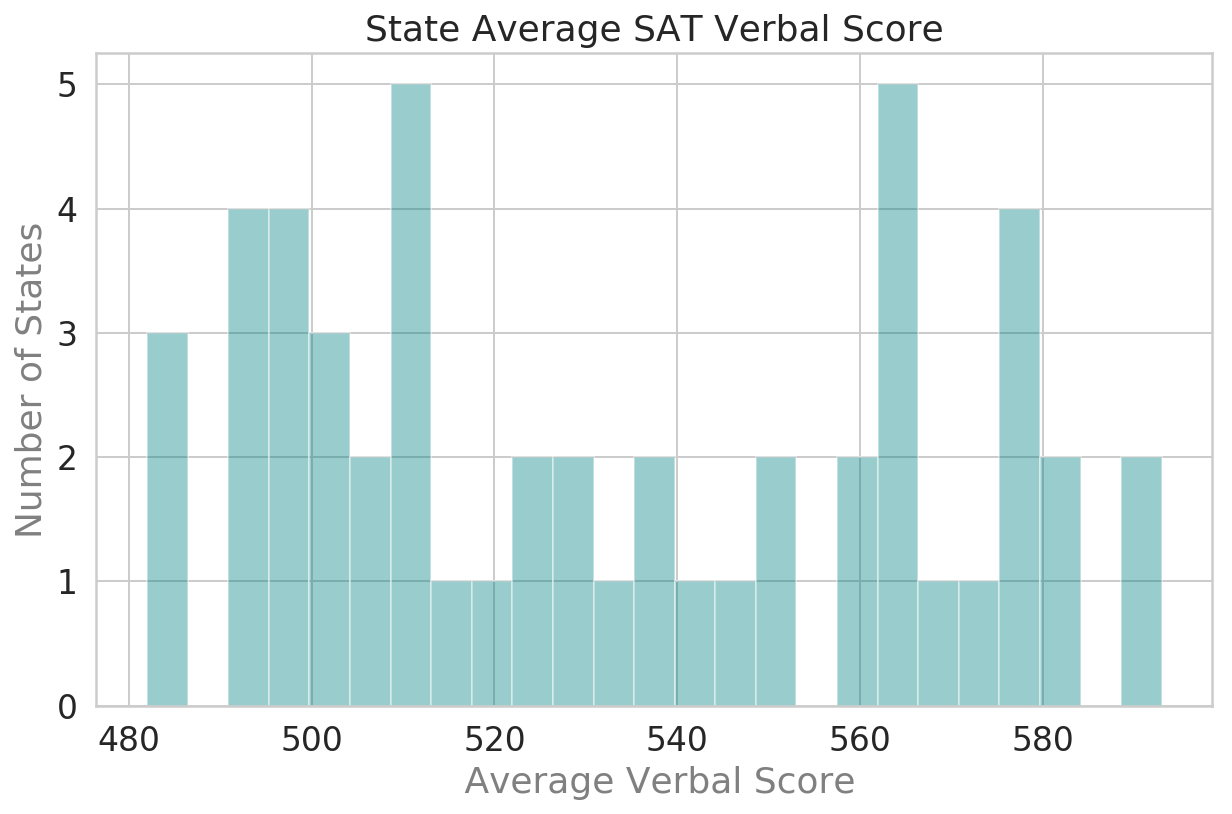

In [10]:
sns.distplot(satscore['Verbal'],kde=False,color='teal',bins=25,).set_title('State Average SAT Verbal Score')
plt.ylabel('Number of States',rotation=90,color='gray')
plt.xlabel(' Average Verbal Score',rotation=0,color='gray');

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

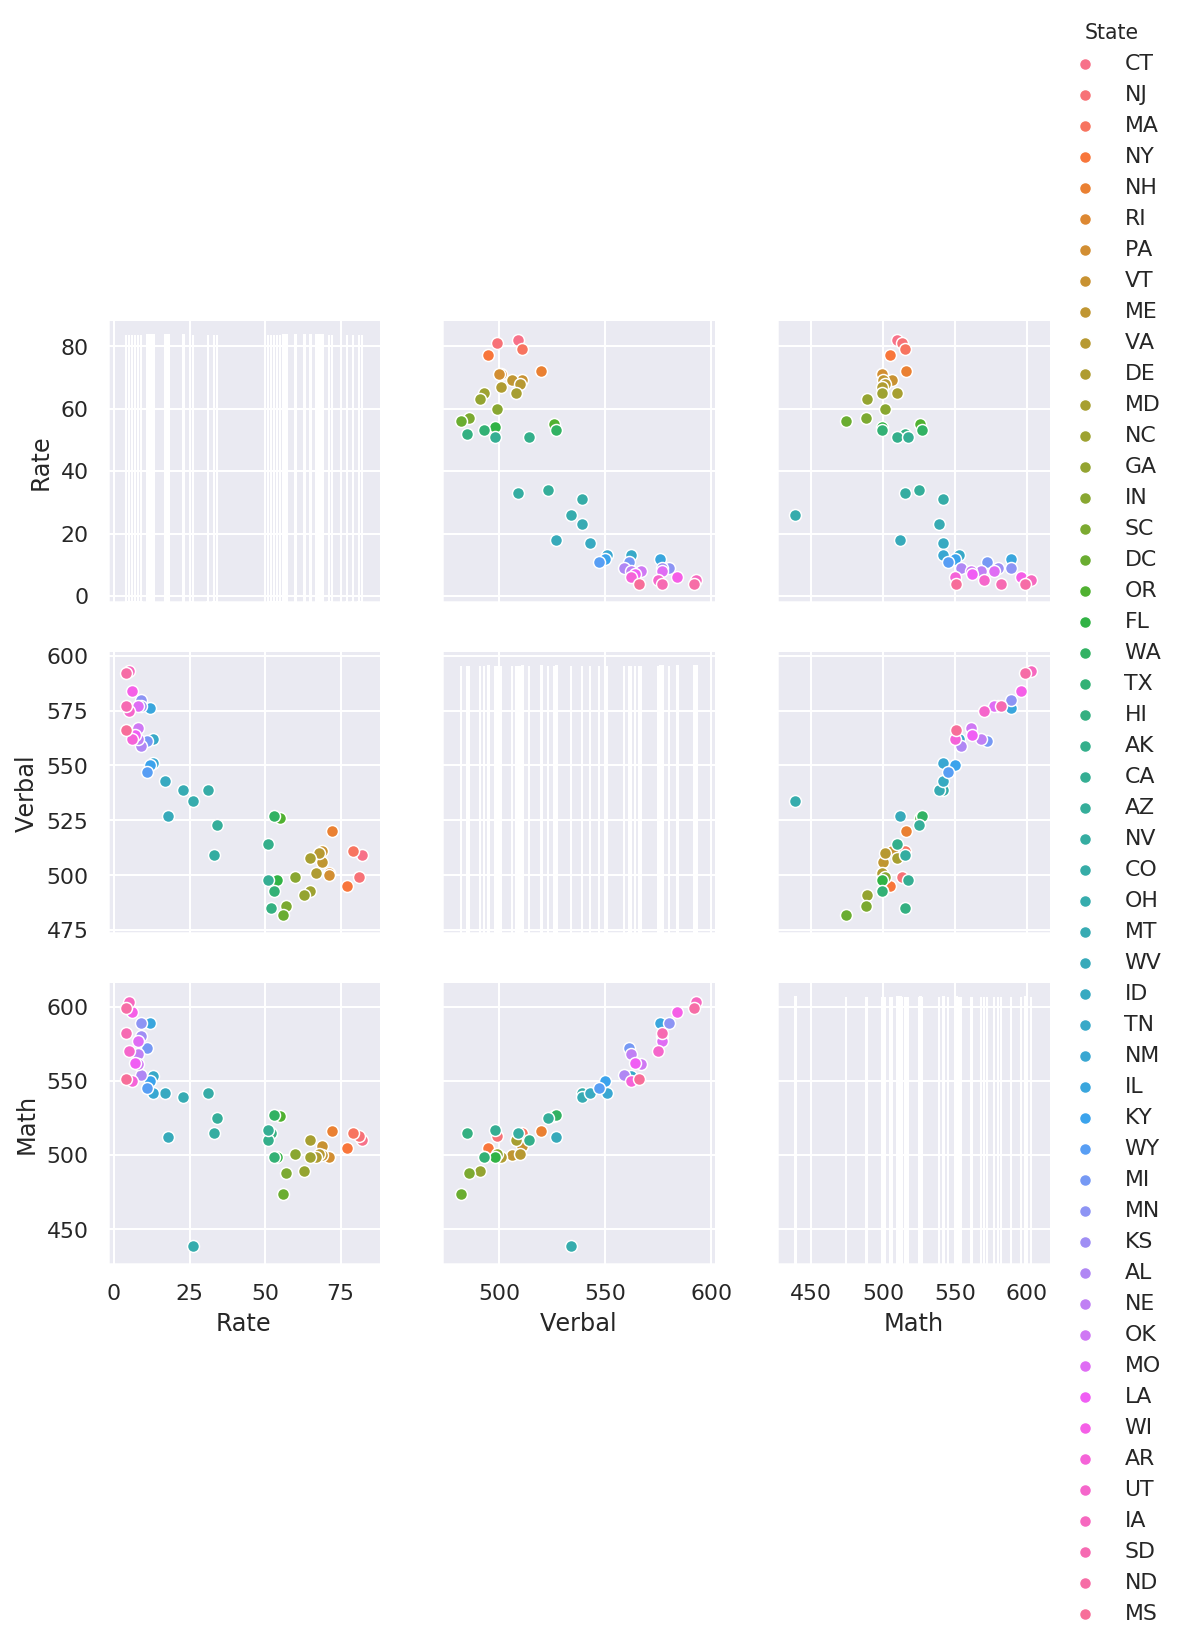

In [11]:
sns.set(rc={'figure.figsize':(10,6)},style='darkgrid',font_scale=1)
sns.pairplot(satscore, hue='State', diag_kind = 'hist');


#### - Analysing these data, it shows that the states with better maths and verbal grades had lower 'rates'.
#### - This contradicts if 'rate' referred to passing rate (nor failure rate). It has to represent something else.
#### - Concluded that Rate referred to participation rate.
#### - This made sense, showing us that the states with lower participation rate did better, as the students who joined were really motivated and put in effort, or were just the elites.
#### - The states with higher participation rates could have students forced to participate in SAT as a compulsory thing.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

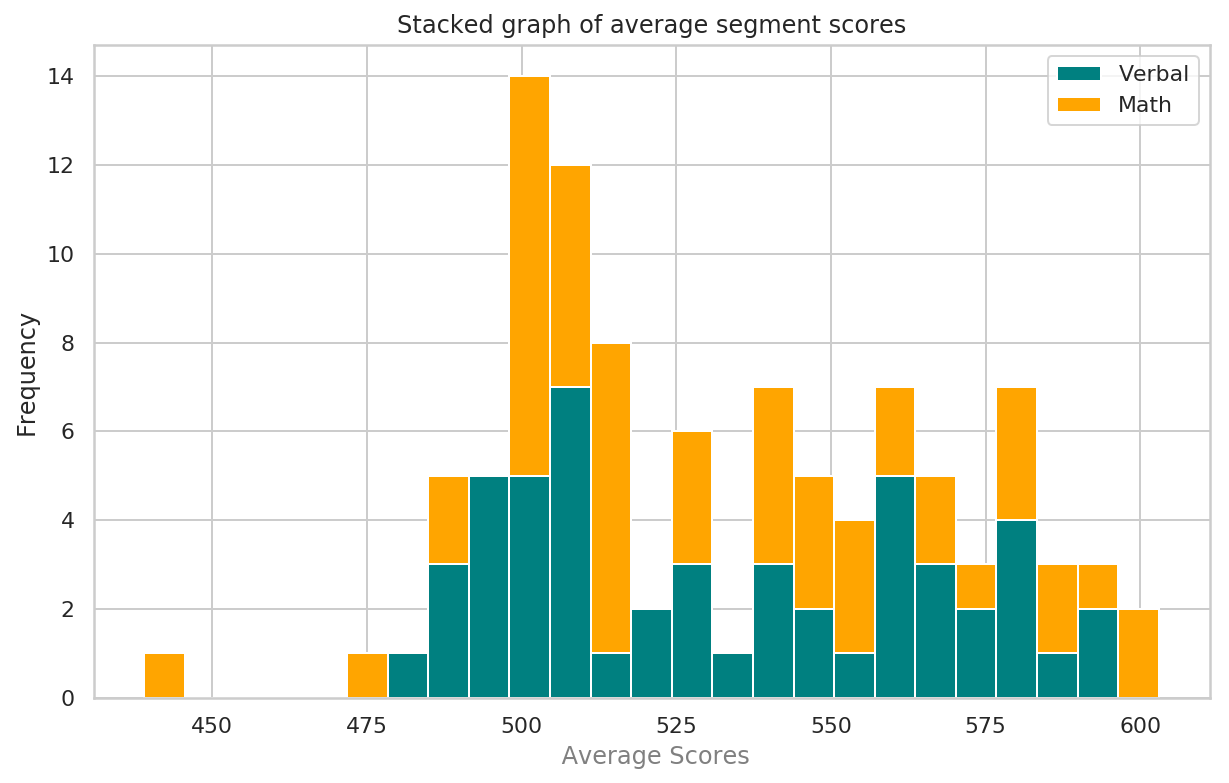

In [12]:
sns.set(rc={'figure.figsize':(10,6)},style='whitegrid',font_scale=1)
satscore2 = satscore.drop(['Rate'],axis=1)

satscore2.plot.hist(stacked = True, figsize = (10,6),bins=25, color=['Teal','Orange'])
plt.xlabel(' Average Scores',rotation=0,color='gray')
plt.title('Stacked graph of average segment scores');

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

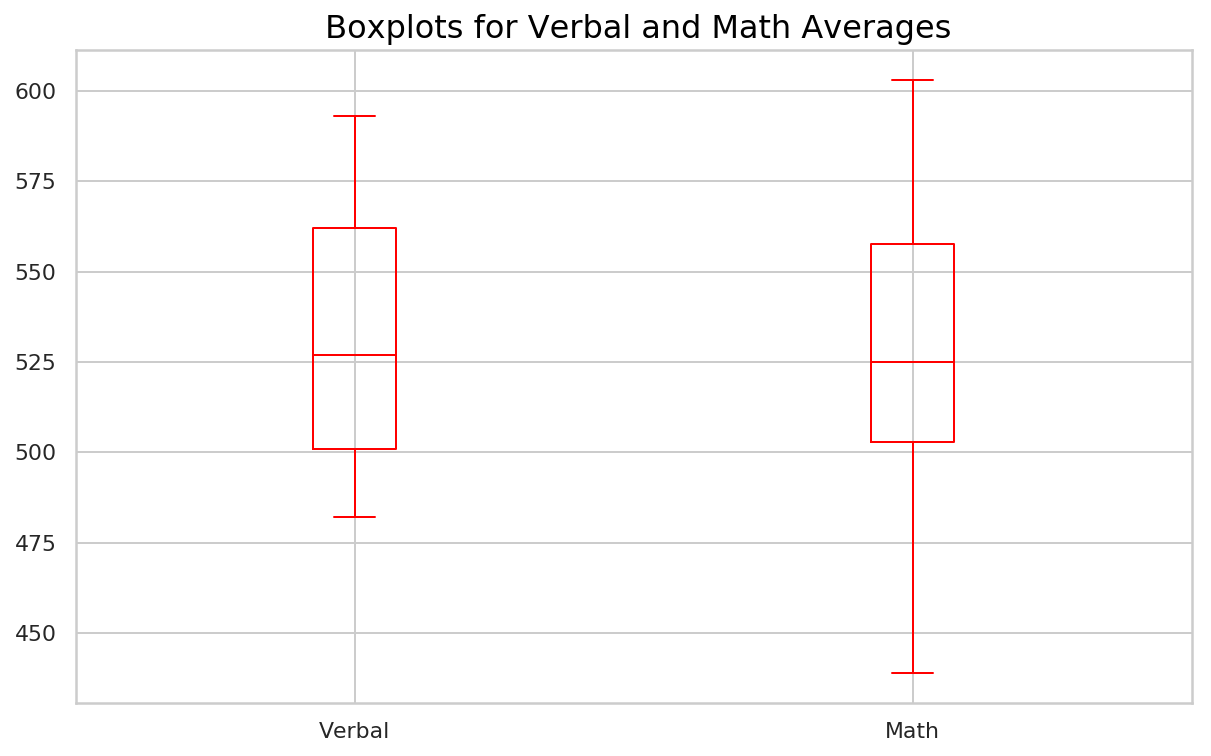

In [13]:
satscore2.plot.box(figsize=(10,6), color='Red')
plt.title(' Boxplots for Verbal and Math Averages',rotation=0,color='Black', fontsize=16);

A boxplot allows us to easily visualize and compare the distributions than other graphs.  
For example in this case, we can easily summise that the students in America have a wide variance when it comes to Math capabilities. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


### How to standardize multiple variables
https://inomics.com/insight/standardizing-the-data-of-different-scales-which-method-to-use-1036202
  
- One way will be to convert both set of scores to a percentage out of 800 and use it to compare with Rate.  
- The other method can be standardizing all data using Z-score. 

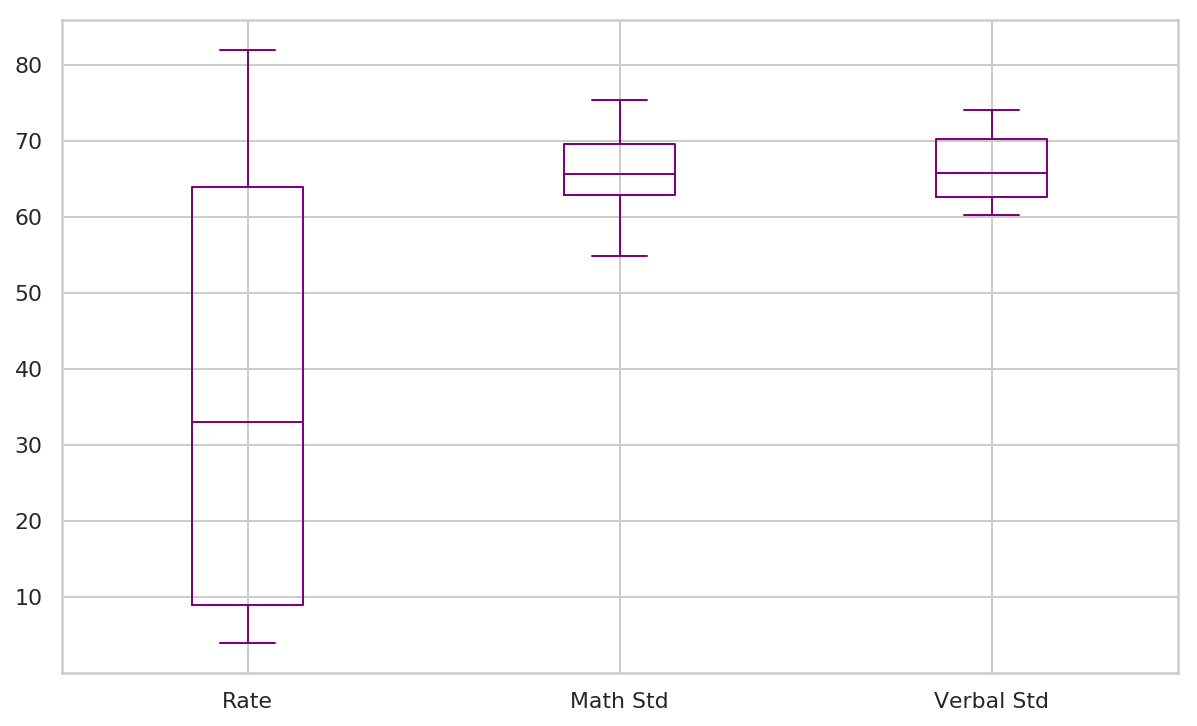

In [14]:
# Method 1: Standardizing scores out of 800 - standardized scores too clustered around a small range compared to Rate

stdscore = satscore
stdscore['Math Std'] =  stdscore['Math'].apply(lambda x: x/8)
stdscore['Verbal Std'] = stdscore['Verbal'].apply(lambda x: x/8)

stdscore[['State','Rate','Math Std','Verbal Std']].plot.box(figsize=(10,6), color='Purple');


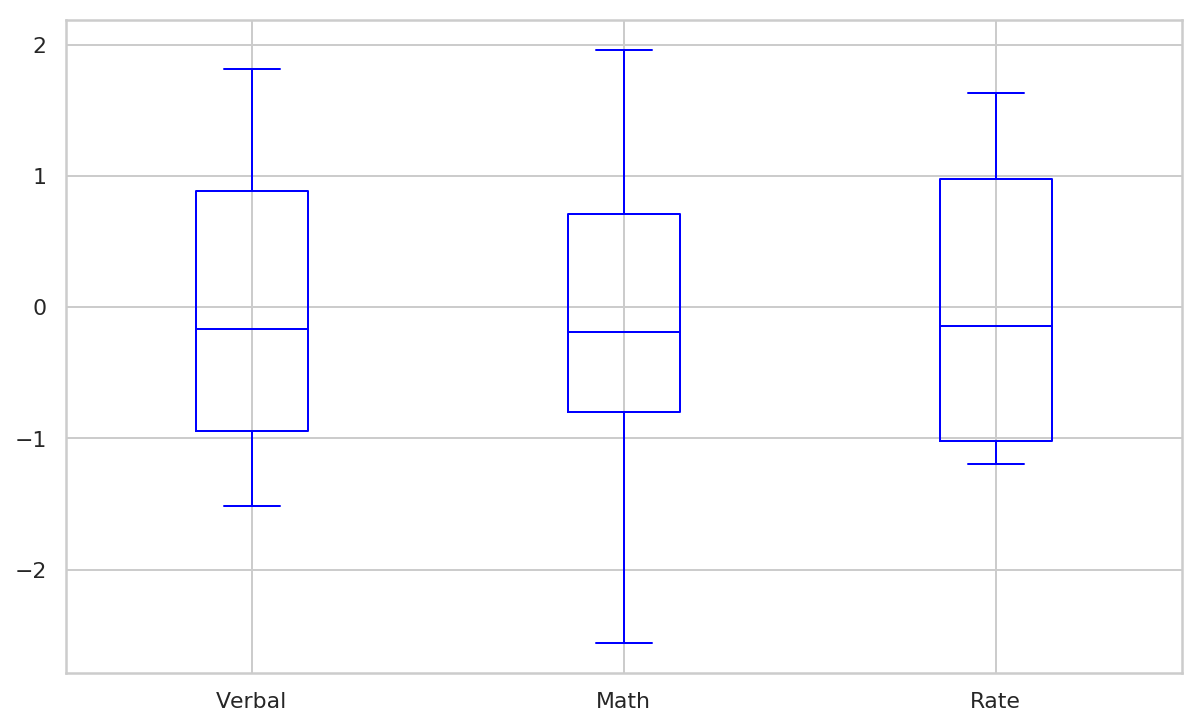

In [15]:
# Method 2: Z- score

satscorez = (satscore[['Verbal','Math','Rate']]-satscore[['Verbal','Math','Rate']].mean())/satscore[['Verbal','Math','Rate']].std()
satscorez.plot.box(figsize=(10,6), color='Blue');

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [16]:
# Creating a list of States where the verbal scores are above the mean

verbalmean=(list(satscore.loc[satscore['Verbal']>(np.mean(satscore['Verbal'])) , 'State']))
print('The',len(verbalmean) , 'states that do better than average are: ' ,verbalmean)

The 24 states that do better than average are:  ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


- After removing the 'all' row, there are 24 states doing better than average. This tells us that slightly less than half of America's states are doing above average.
- This tells us that the Verbal scores might be skewed to the left.
- Interestingly, these states are not the usual 'elite' states
- This could help support the theory that SAT participation is higher in elite states as they are expected to compete for a place in university

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

The top 24 states that do better than average are:  ['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']
[]


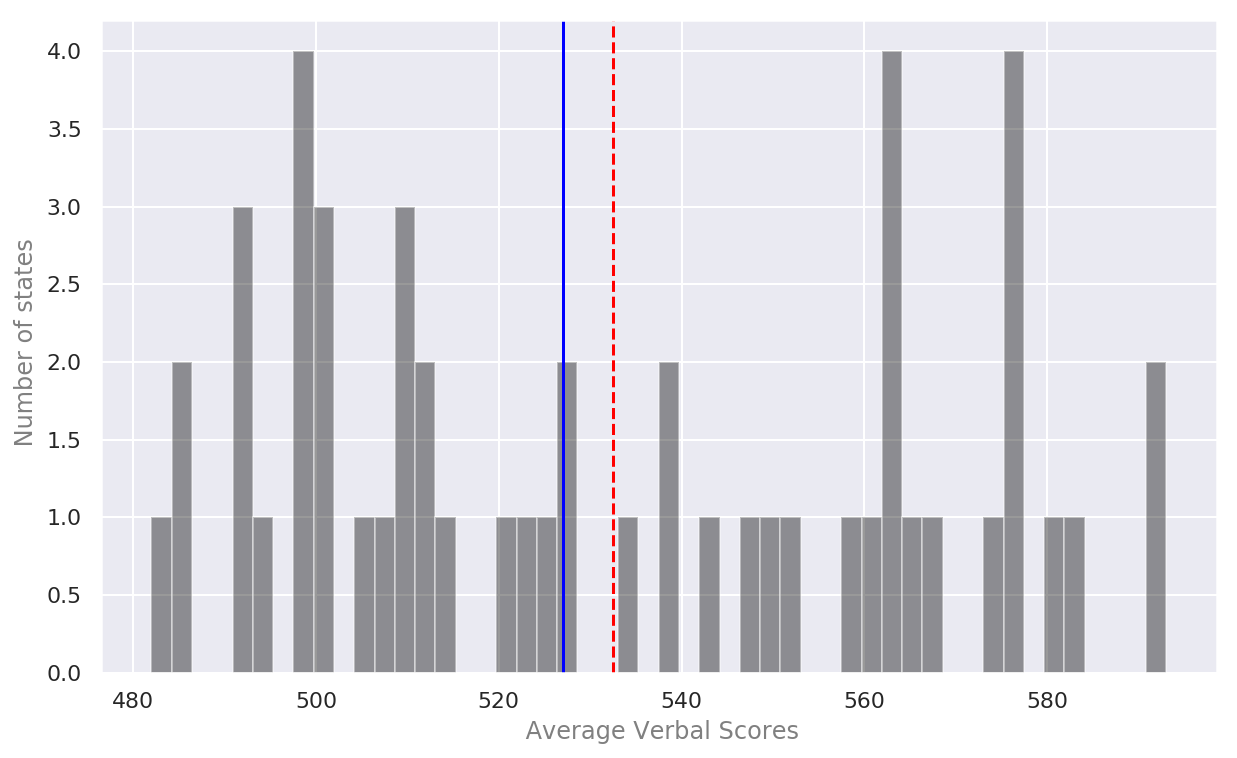

In [17]:

verbalmedian=(list(satscore.loc[satscore['Verbal']>(np.median(satscore['Verbal'])) , 'State']))
print('The top',len(verbalmedian) , 'states that do better than average are: ' ,verbalmedian)

print(list(set(verbalmedian)-set(verbalmean))) #There are no states above median but below mean

# It shows the median lies below the mean. And WA and WV are the states that are below average but above median.
# It also shows that more states lie below the national average.
# Another possibility is that

sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(satscore['Verbal'],kde=False,color='Black',bins=50)
plt.axvline(x = np.mean(satscore['Verbal']),color='Red',linestyle='--')
plt.axvline(x = np.median(satscore['Verbal']),color='blue',linestyle='-')
plt.xlabel(' Average Verbal Scores',rotation=0,color='gray')
plt.ylabel(' Number of states',rotation=90,color='gray');

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [18]:
satscore['Verbal-Math Diff'] = satscore['Verbal']-satscore['Math']
satscore.head(10)

,State,Rate,Verbal,Math,Math Std,Verbal Std,Verbal-Math Diff
0,CT,82,509,510,63.750,63.625,-1
1,NJ,81,499,513,64.125,62.375,-14
2,MA,79,511,515,64.375,63.875,-4
3,NY,77,495,505,63.125,61.875,-10
4,NH,72,520,516,64.500,65.000,4
5,RI,71,501,499,62.375,62.625,2
6,PA,71,500,499,62.375,62.500,1
7,VT,69,511,506,63.250,63.875,5
8,ME,69,506,500,62.500,63.250,6
9,VA,68,510,501,62.625,63.750,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [19]:
satscoreverbal = satscore.sort_values(by=['Verbal-Math Diff'], ascending = False).head(10)
satscoreverbal

,State,Rate,Verbal,Math,Math Std,Verbal Std,Verbal-Math Diff
27,OH,26,534,439,54.875,66.750,95
50,MS,4,566,551,68.875,70.750,15
29,WV,18,527,512,64.000,65.875,15
45,AR,6,562,550,68.750,70.250,12
31,TN,13,562,553,69.125,70.250,9
9,VA,68,510,501,62.625,63.750,9
32,NM,13,551,542,67.750,68.875,9
16,DC,56,482,474,59.250,60.250,8
8,ME,69,506,500,62.500,63.250,6
41,OK,8,567,561,70.125,70.875,6


In [20]:
satscoremath = satscore.sort_values(by=['Verbal-Math Diff']).head(10)
satscoremath

,State,Rate,Verbal,Math,Math Std,Verbal Std,Verbal-Math Diff
21,HI,52,485,515,64.375,60.625,-30
23,CA,51,498,517,64.625,62.250,-19
1,NJ,81,499,513,64.125,62.375,-14
33,IL,12,576,589,73.625,72.000,-13
44,WI,6,584,596,74.500,73.000,-12
36,MI,11,561,572,71.500,70.125,-11
3,NY,77,495,505,63.125,61.875,-10
47,IA,5,593,603,75.375,74.125,-10
37,MN,9,580,589,73.625,72.500,-9
49,ND,4,592,599,74.875,74.000,-7


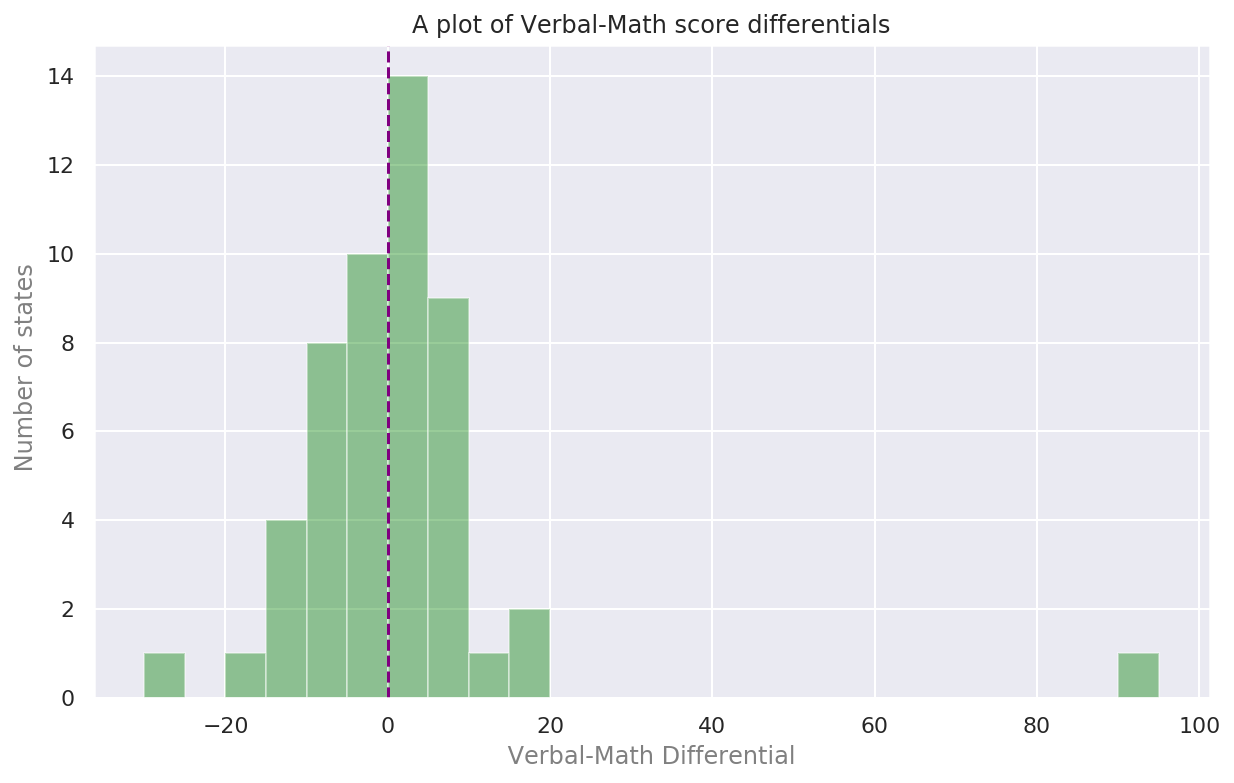

In [21]:
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(satscore['Verbal-Math Diff'],kde=False,color='green',bins=25)
plt.axvline(x = 0,color='purple',linestyle='--',)
plt.title('A plot of Verbal-Math score differentials')
plt.xlabel(' Verbal-Math Differential ',rotation=0,color='gray')
plt.ylabel(' Number of states',rotation=90,color='gray');


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


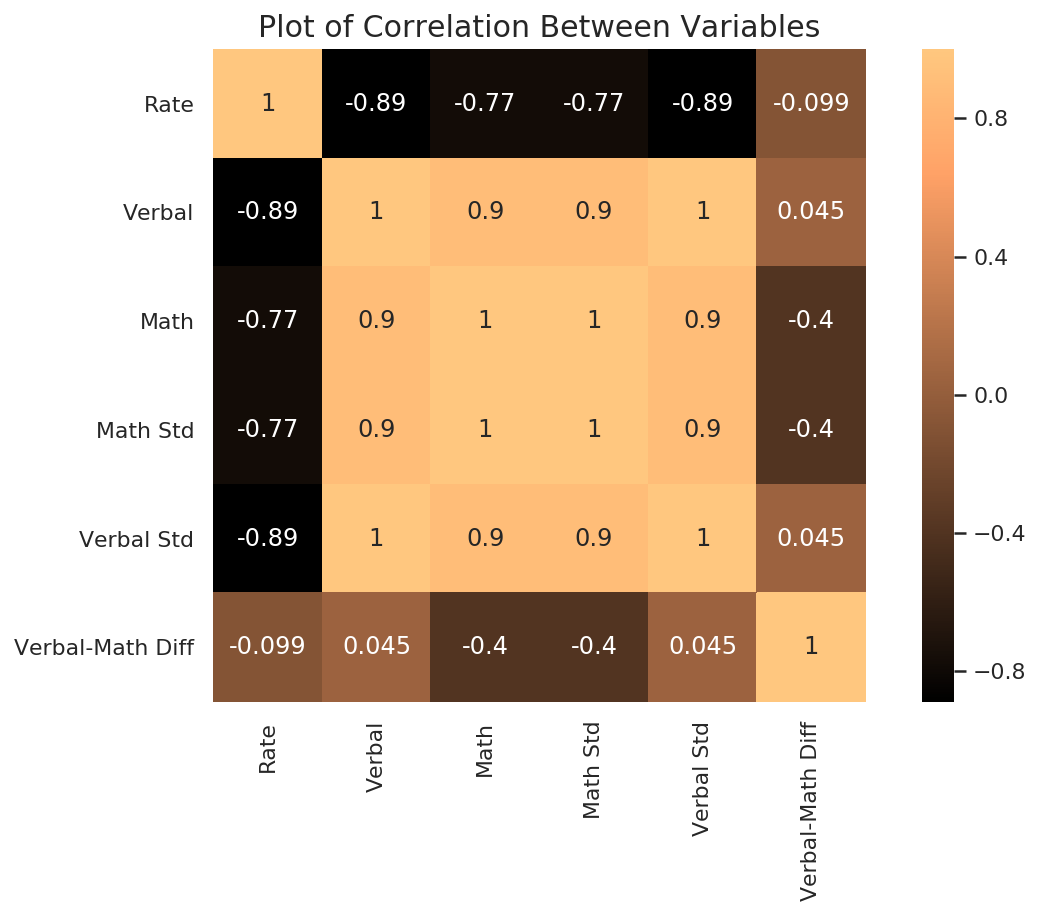

In [22]:
corrmat=satscore.drop(['State'],axis=1)
corrmat
sns.heatmap(corrmat.corr(),annot=True,square=True,cmap='copper')
plt.title('Plot of Correlation Between Variables',fontsize=15);

- There is a strong correlation between verbal and math scores.  
- Whereas, there is significant negative correlation between Rate and scores for both segments.  


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [23]:
corrmat.describe()

,Rate,Verbal,Math,Math Std,Verbal Std,Verbal-Math Diff
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,66.480392,66.566176,0.686275
std,27.550681,33.360667,36.287393,4.535924,4.170083,15.839811
min,4.000000,482.000000,439.000000,54.875000,60.250000,-30.000000
25%,9.000000,501.000000,503.000000,62.875000,62.625000,-6.000000
50%,33.000000,527.000000,525.000000,65.625000,65.875000,0.000000
75%,64.000000,562.000000,557.500000,69.687500,70.250000,4.500000
max,82.000000,593.000000,603.000000,75.375000,74.125000,95.000000


- **Count** is the number of values in the column.  
- **Mean** is the average value of the column variable.  
- **Std** is the standard deviation of the column variable.  
- **Min** is the minimum value within the column.  
- **25%** is the 25th percentile value of the column.  
- **50%** is the median value of the column.  
- **75%** is the 75th percentile value of the column.  
- **Max** will be the maximum value within the column.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [24]:
corrmat.cov()

,Rate,Verbal,Math,Math Std,Verbal Std,Verbal-Math Diff
Rate,759.0400,-816.280000,-773.220000,-96.652500,-102.035000,-43.060000
Verbal,-816.2800,1112.934118,1089.404706,136.175588,139.116765,23.529412
Math,-773.2200,1089.404706,1316.774902,164.596863,136.175588,-227.370196
Math Std,-96.6525,136.175588,164.596863,20.574608,17.021949,-28.421275
Verbal Std,-102.0350,139.116765,136.175588,17.021949,17.389596,2.941176
Verbal-Math Diff,-43.0600,23.529412,-227.370196,-28.421275,2.941176,250.899608


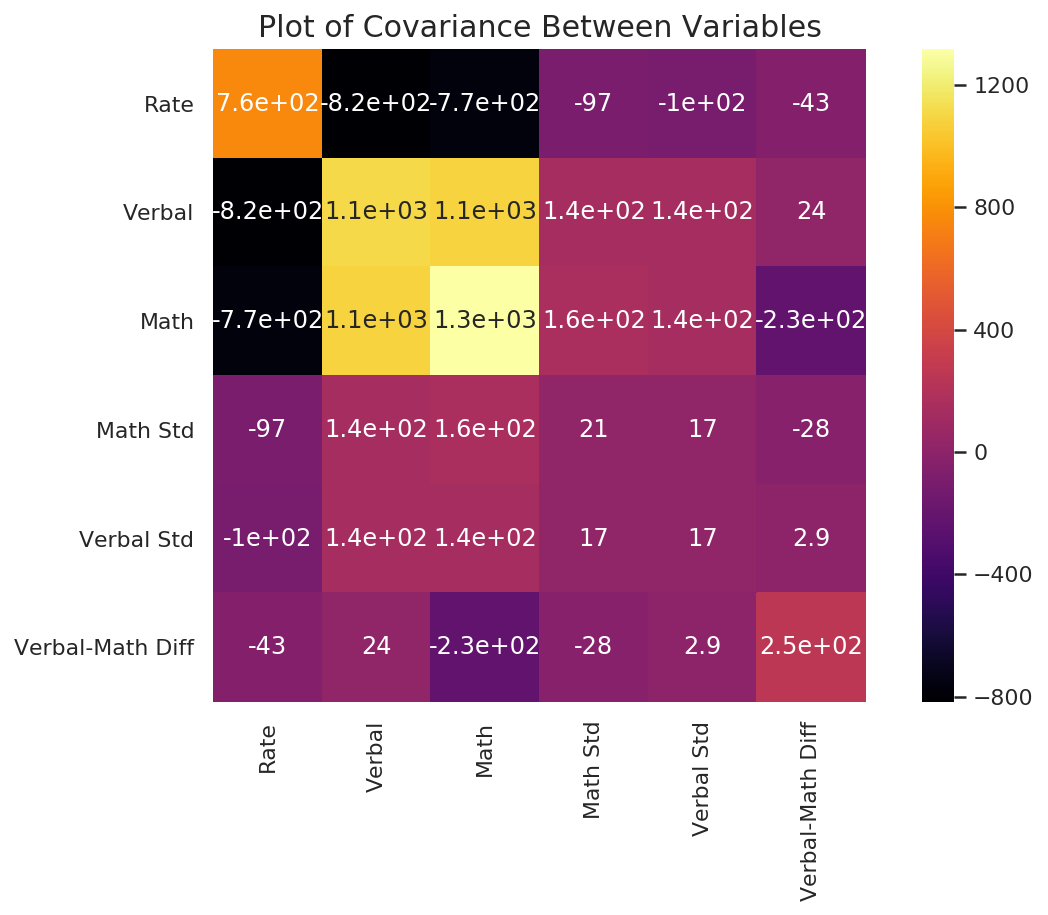

In [25]:
sns.heatmap(corrmat.cov(),annot=True,square=True,cmap='inferno')
plt.title('Plot of Covariance Between Variables',fontsize=15);

- Covariance takes on the units of the measurements used.  
- Because it does so, we cannot use it to compare across different variables.  
- We convert covariance to correlation coefficient by dividing it with the standard deviations of the two variables used.  
- The resulting correlation coefficient has no units, and falls between -1 & +1.  
- This allows us to truly cross examine across various unrelated variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [26]:
# Loading the dataset and briefly surveying it.
# We can observe spelling error in the header and columns not being of type float, signifying dubious datapoints

drugs = pd.read_csv('./drug-use-by-age.csv')
print(drugs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [27]:
print(drugs.shape)

(17, 28)


In [28]:
# Spellchecking and correcting the column headers
drugs=drugs.rename(columns={"pain-releiver-use":"pain-reliever-use","pain-releiver-frequency":"pain-reliever-frequency"})

In [29]:
# Investigating columns that aren't of the expected type. Example, we can see a value '-' where it should be an integer
drugs['cocaine-frequency'].unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0',
       '-'], dtype=object)

In [30]:
# Lets take the problematic columns and 'coerce' them to be numeric 
drugs[["cocaine-frequency","crack-frequency","heroin-frequency","inhalant-frequency","oxycontin-frequency","meth-frequency"]]=drugs[["cocaine-frequency","crack-frequency","heroin-frequency","inhalant-frequency","oxycontin-frequency","meth-frequency"]].apply(pd.to_numeric, errors='coerce')

In [31]:
# And to make sure...
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-reliever-use          17 non-null float64
pain-reliever-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### Summary  
In short, we imported the dataset and performed a quick check on it.  
We edited the column headers and looked out for null values and then problematic datapoints.   
We then proceeded to clean the data and make the column types correct for analysing.  
`age` was left as a string object as the groups were not equally defined age ranges.

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question **should be a written description of what you infer about the dataset.**

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

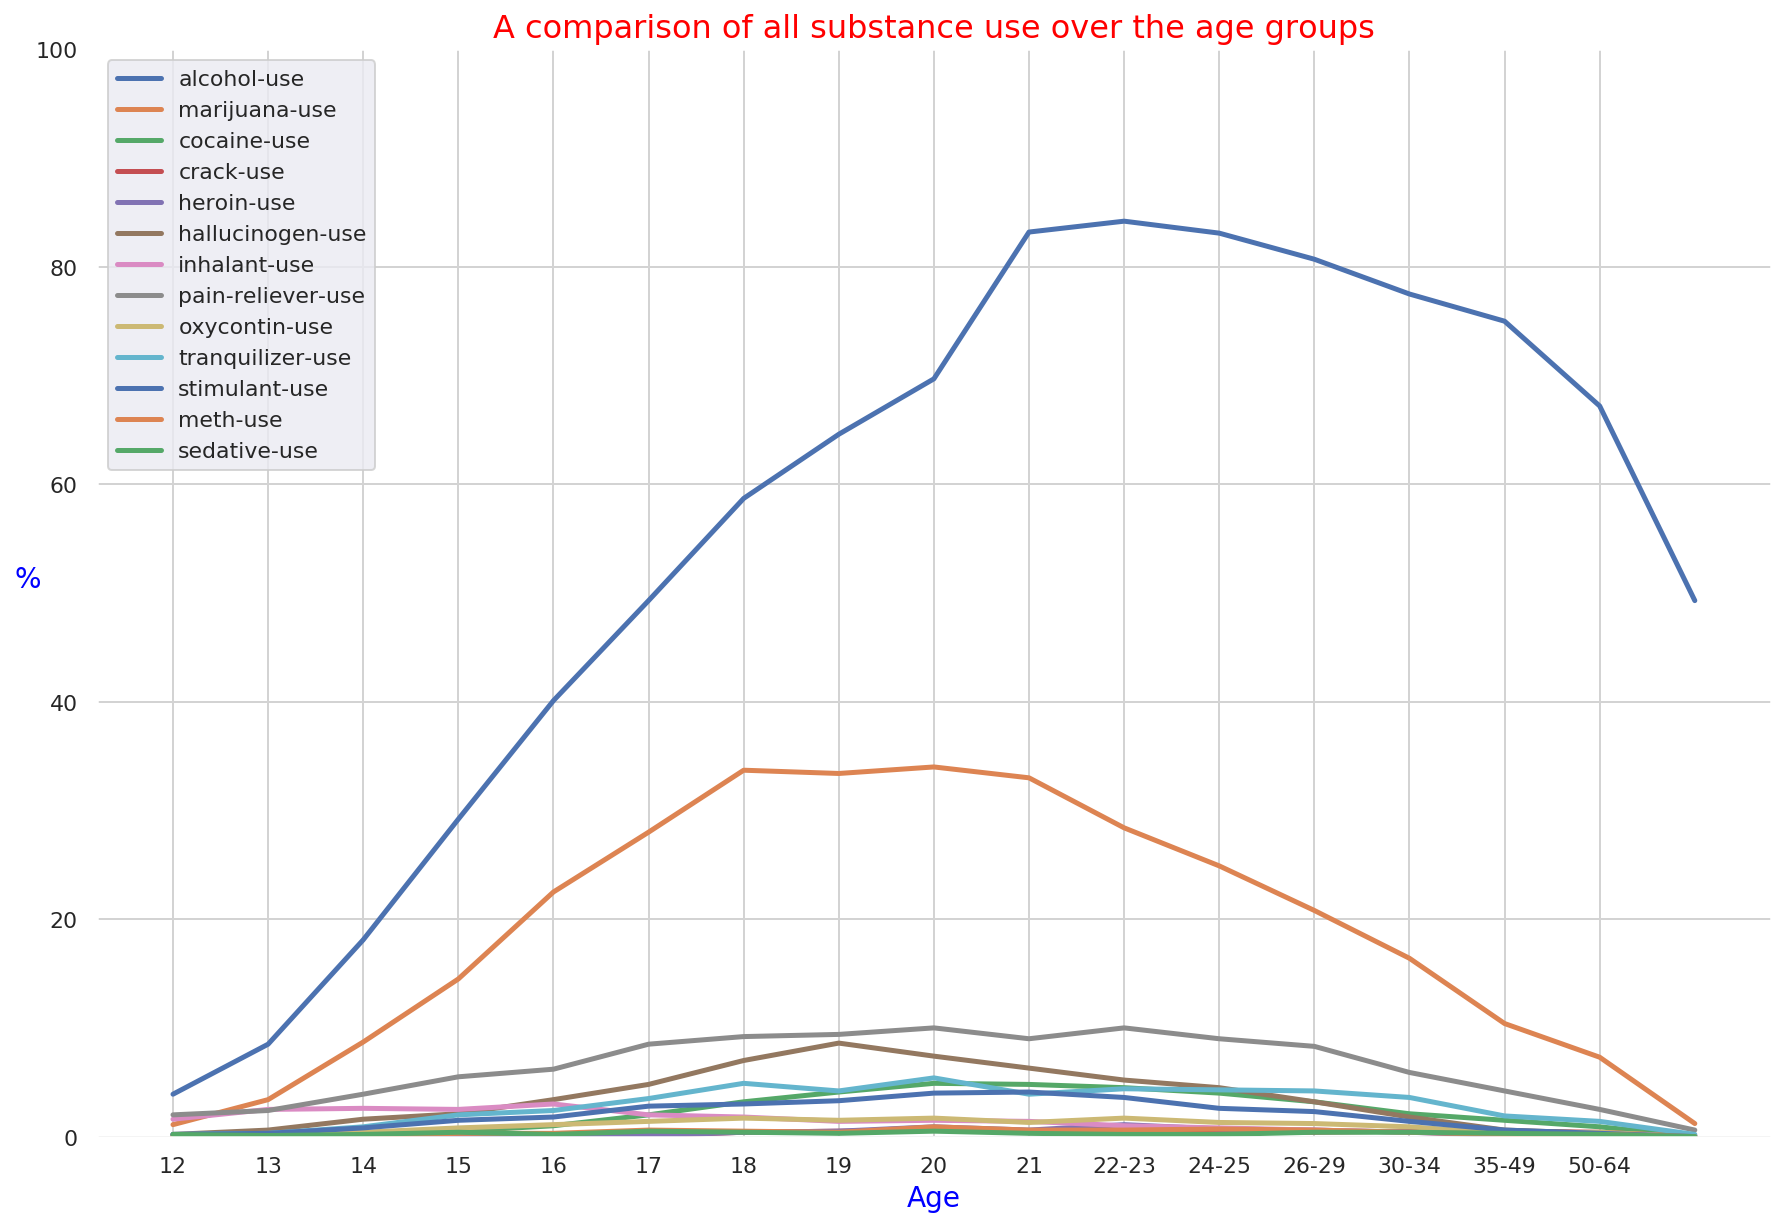

In [32]:
drugs.loc[:,'alcohol-use':'sedative-use':2].plot.line(figsize=(15,10),lw=2.5)
ax=plt.gca()
ax.set_facecolor('xkcd:white')
ax.grid(color='lightgray')
plt.xlabel('Age',fontsize=14,color='Blue')
plt.ylabel('%',rotation=0,fontsize=14,color='Blue')
plt.ylim(0,100)
plt.title('A comparison of all substance use over the age groups',fontsize=16,color='Red')
plt.legend()
plt.xticks(np.arange(16),np.array(drugs['age']));


#### We can observe that alcohol and marijuana use is prevalent.  
- Perhaps oweing to their accessibility and price.  
- It is perhaps also why they are a gateway drug.  
- We can see alcohol use jumps upon entering adulthood.  
- Let's explore the breakdown of the other drugs by removing alcohol and marijuana

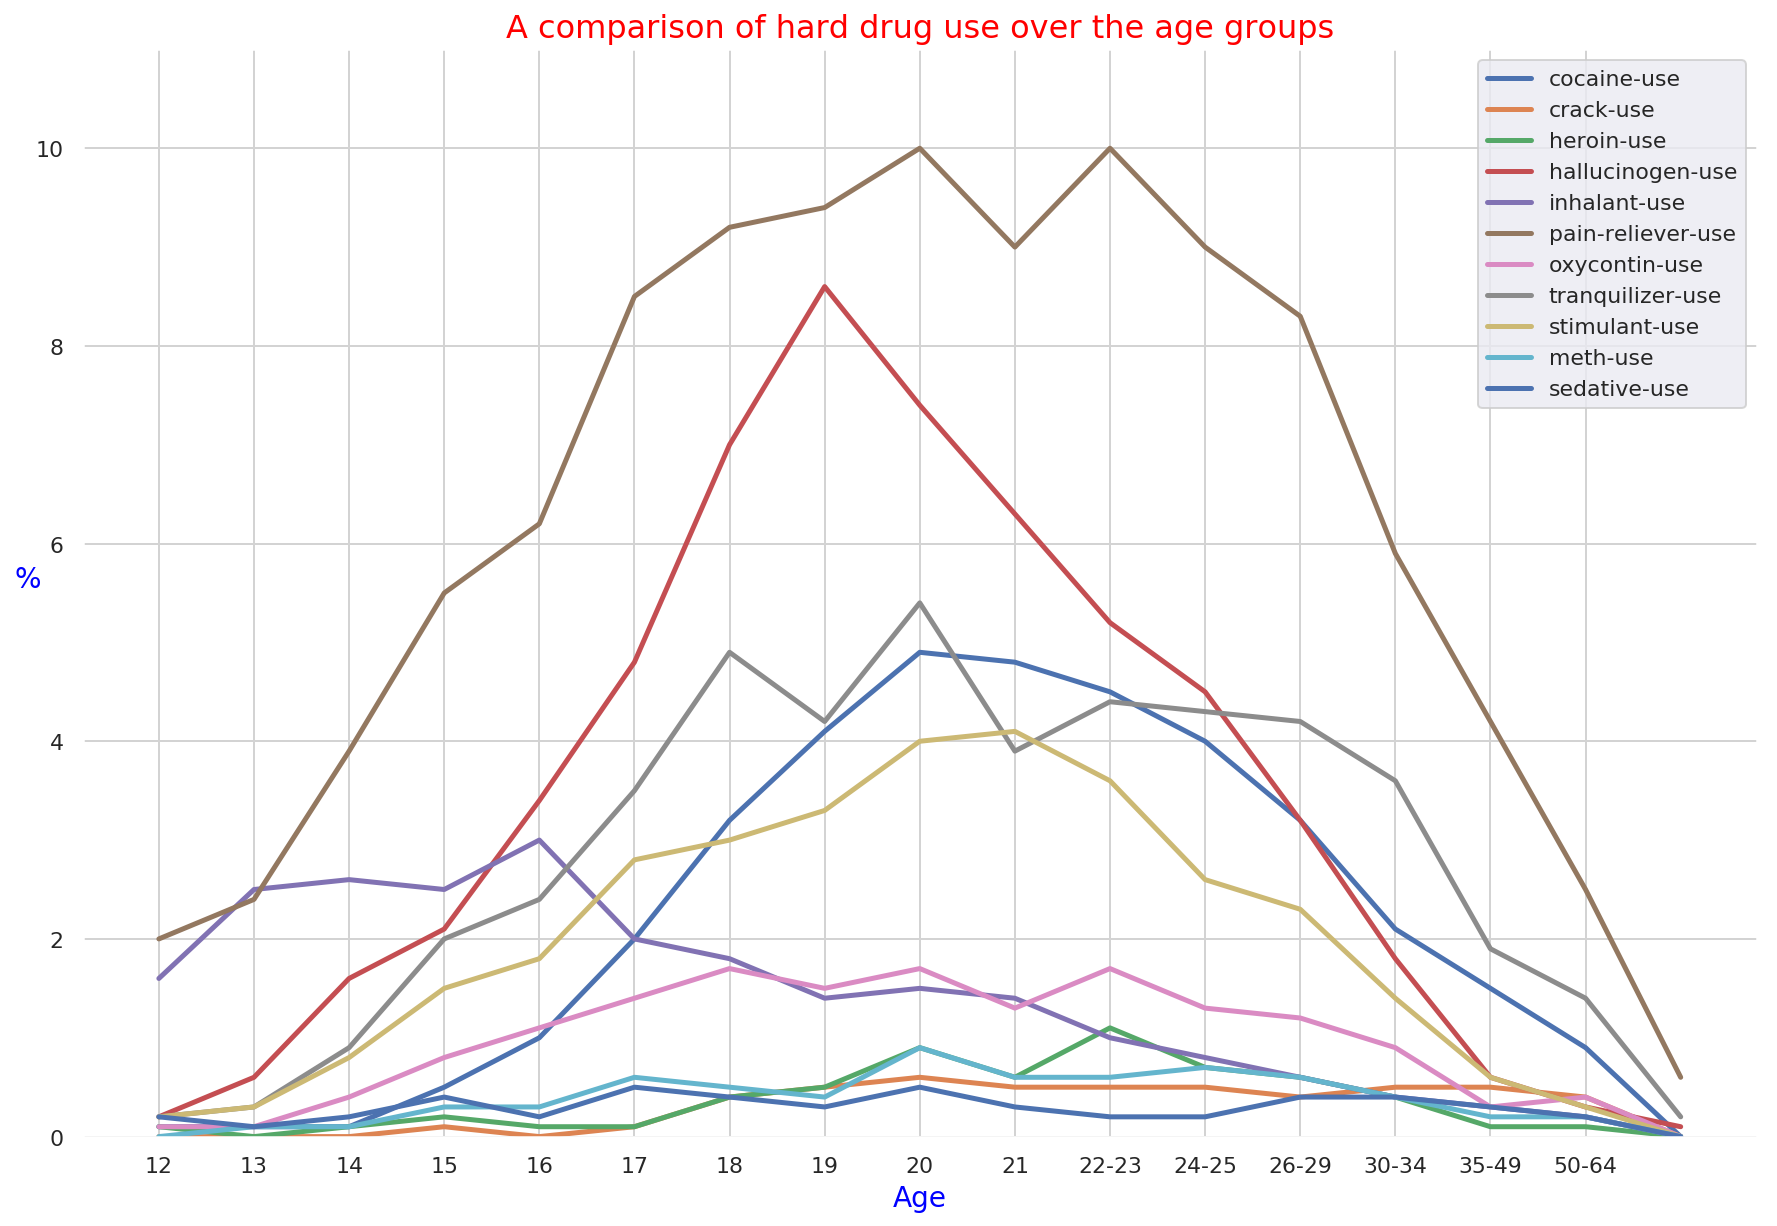

In [33]:
drugs.loc[:,'cocaine-use':'sedative-use':2].plot.line(figsize=(15,10),lw=2.5)
ax=plt.gca()
ax.set_facecolor('xkcd:white')
ax.grid(color='lightgray')
plt.xlabel('Age',fontsize=14,color='Blue')
plt.ylabel('%',rotation=0,fontsize=14,color='Blue')
plt.ylim(0,11)
plt.title('A comparison of hard drug use over the age groups',fontsize=16,color='Red')
plt.legend()
plt.xticks(np.arange(16),np.array(drugs['age']));

#### Here we observe that Pain Relievers and Tranquilizers remain higher as we move up the age brackets  
- Pain relievers are the third most abused class of drugs.  
- Possibly due to the ease of access over the counter.  
- Remains high as the abusers age, ease of obtaining them.  
- 

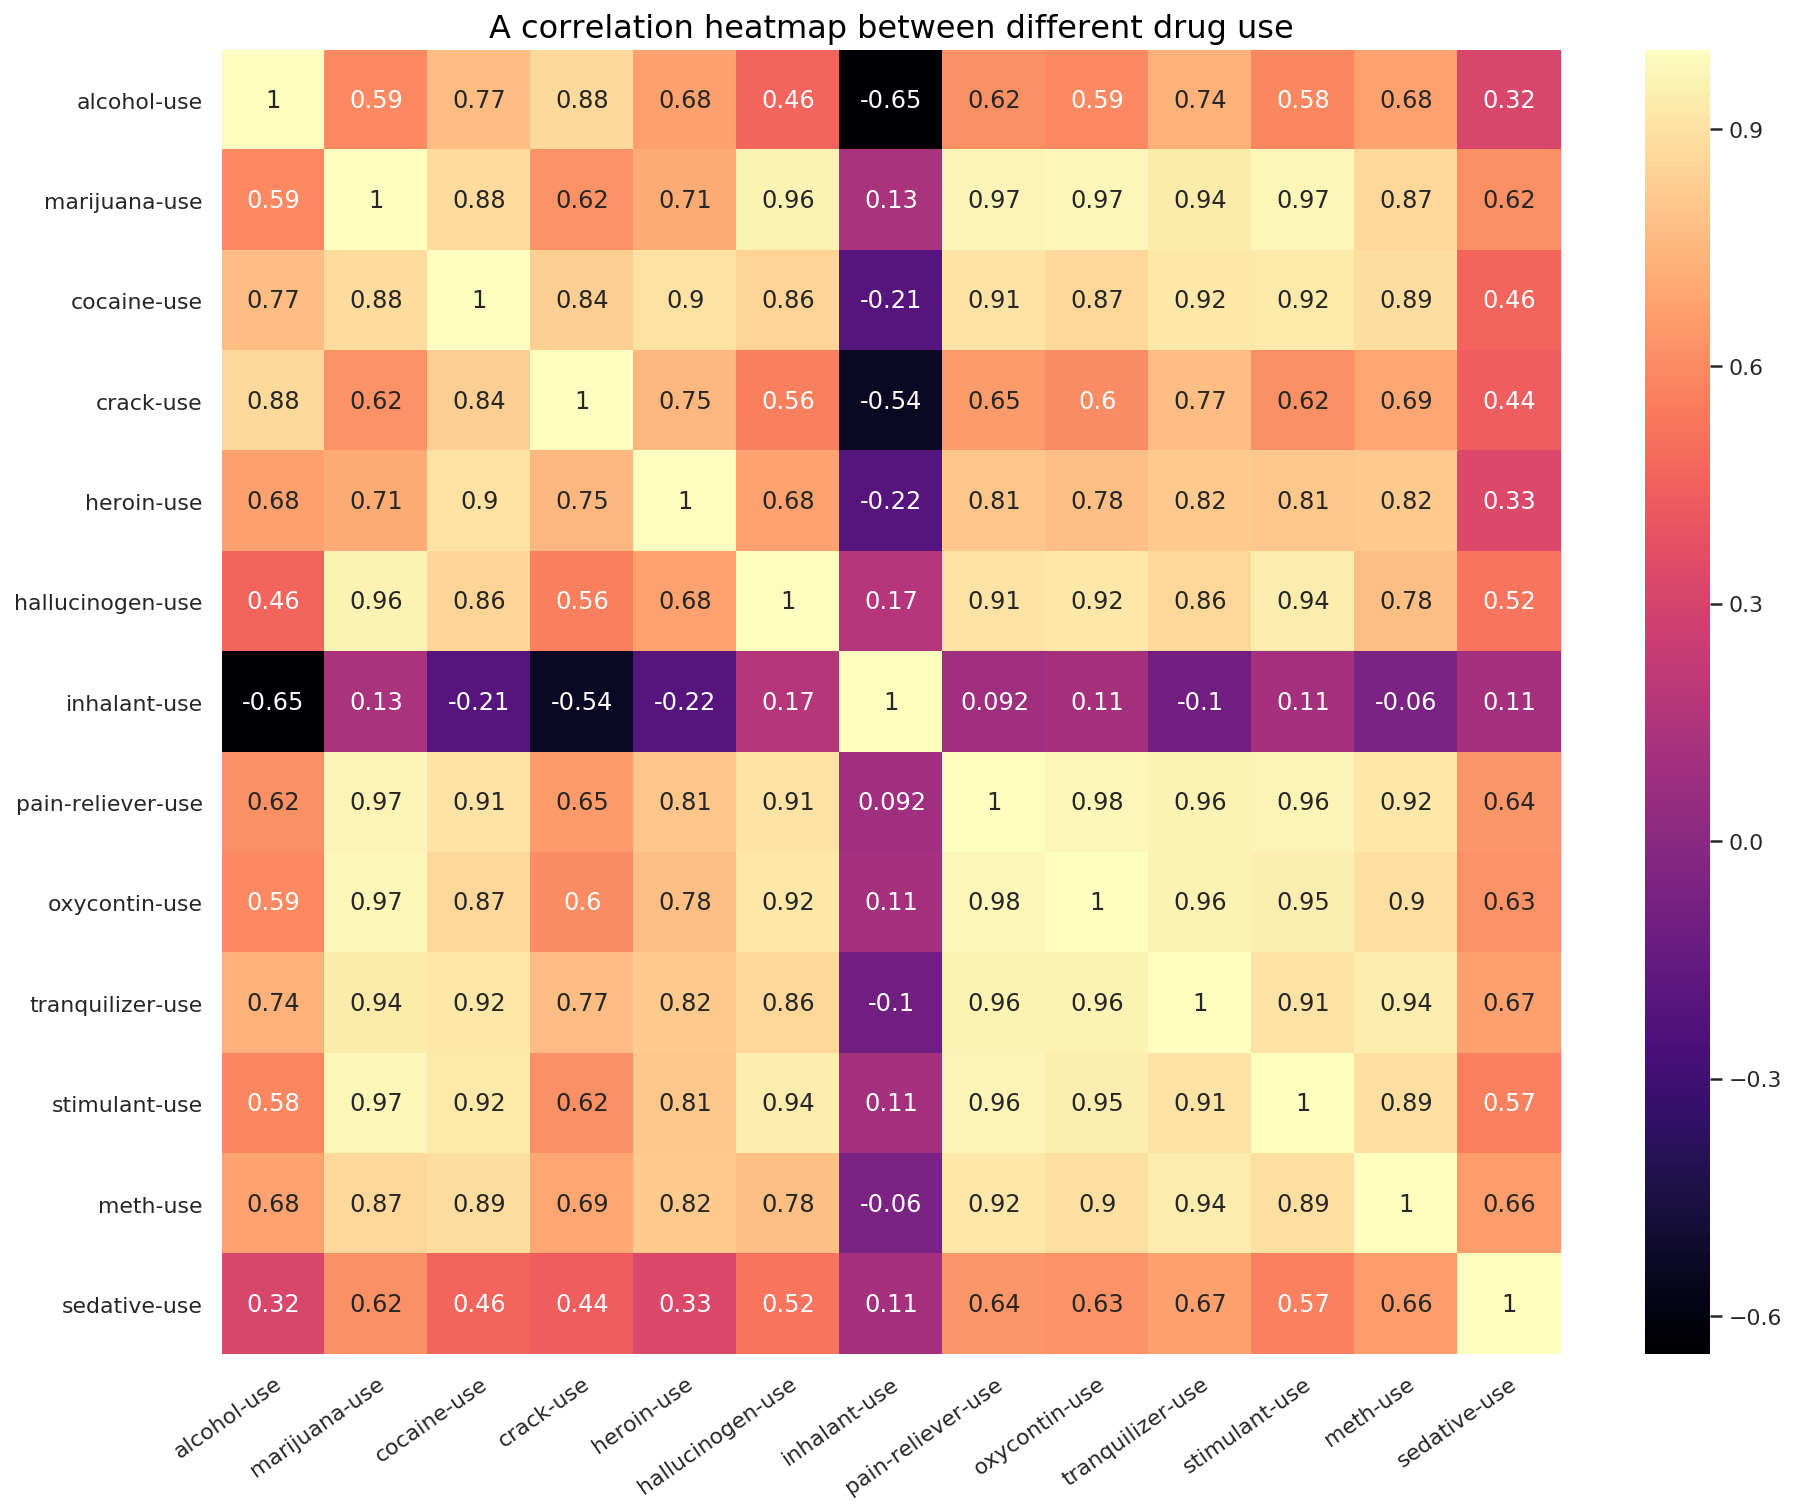

In [34]:
plt.figure(figsize = (15,12))
sns.heatmap(drugs.loc[:,'alcohol-use'::2].corr(), cmap='magma',annot=True)
plt.title('A correlation heatmap between different drug use',fontsize=16,color='black')
plt.xticks(rotation=35, ha='right', rotation_mode='anchor');

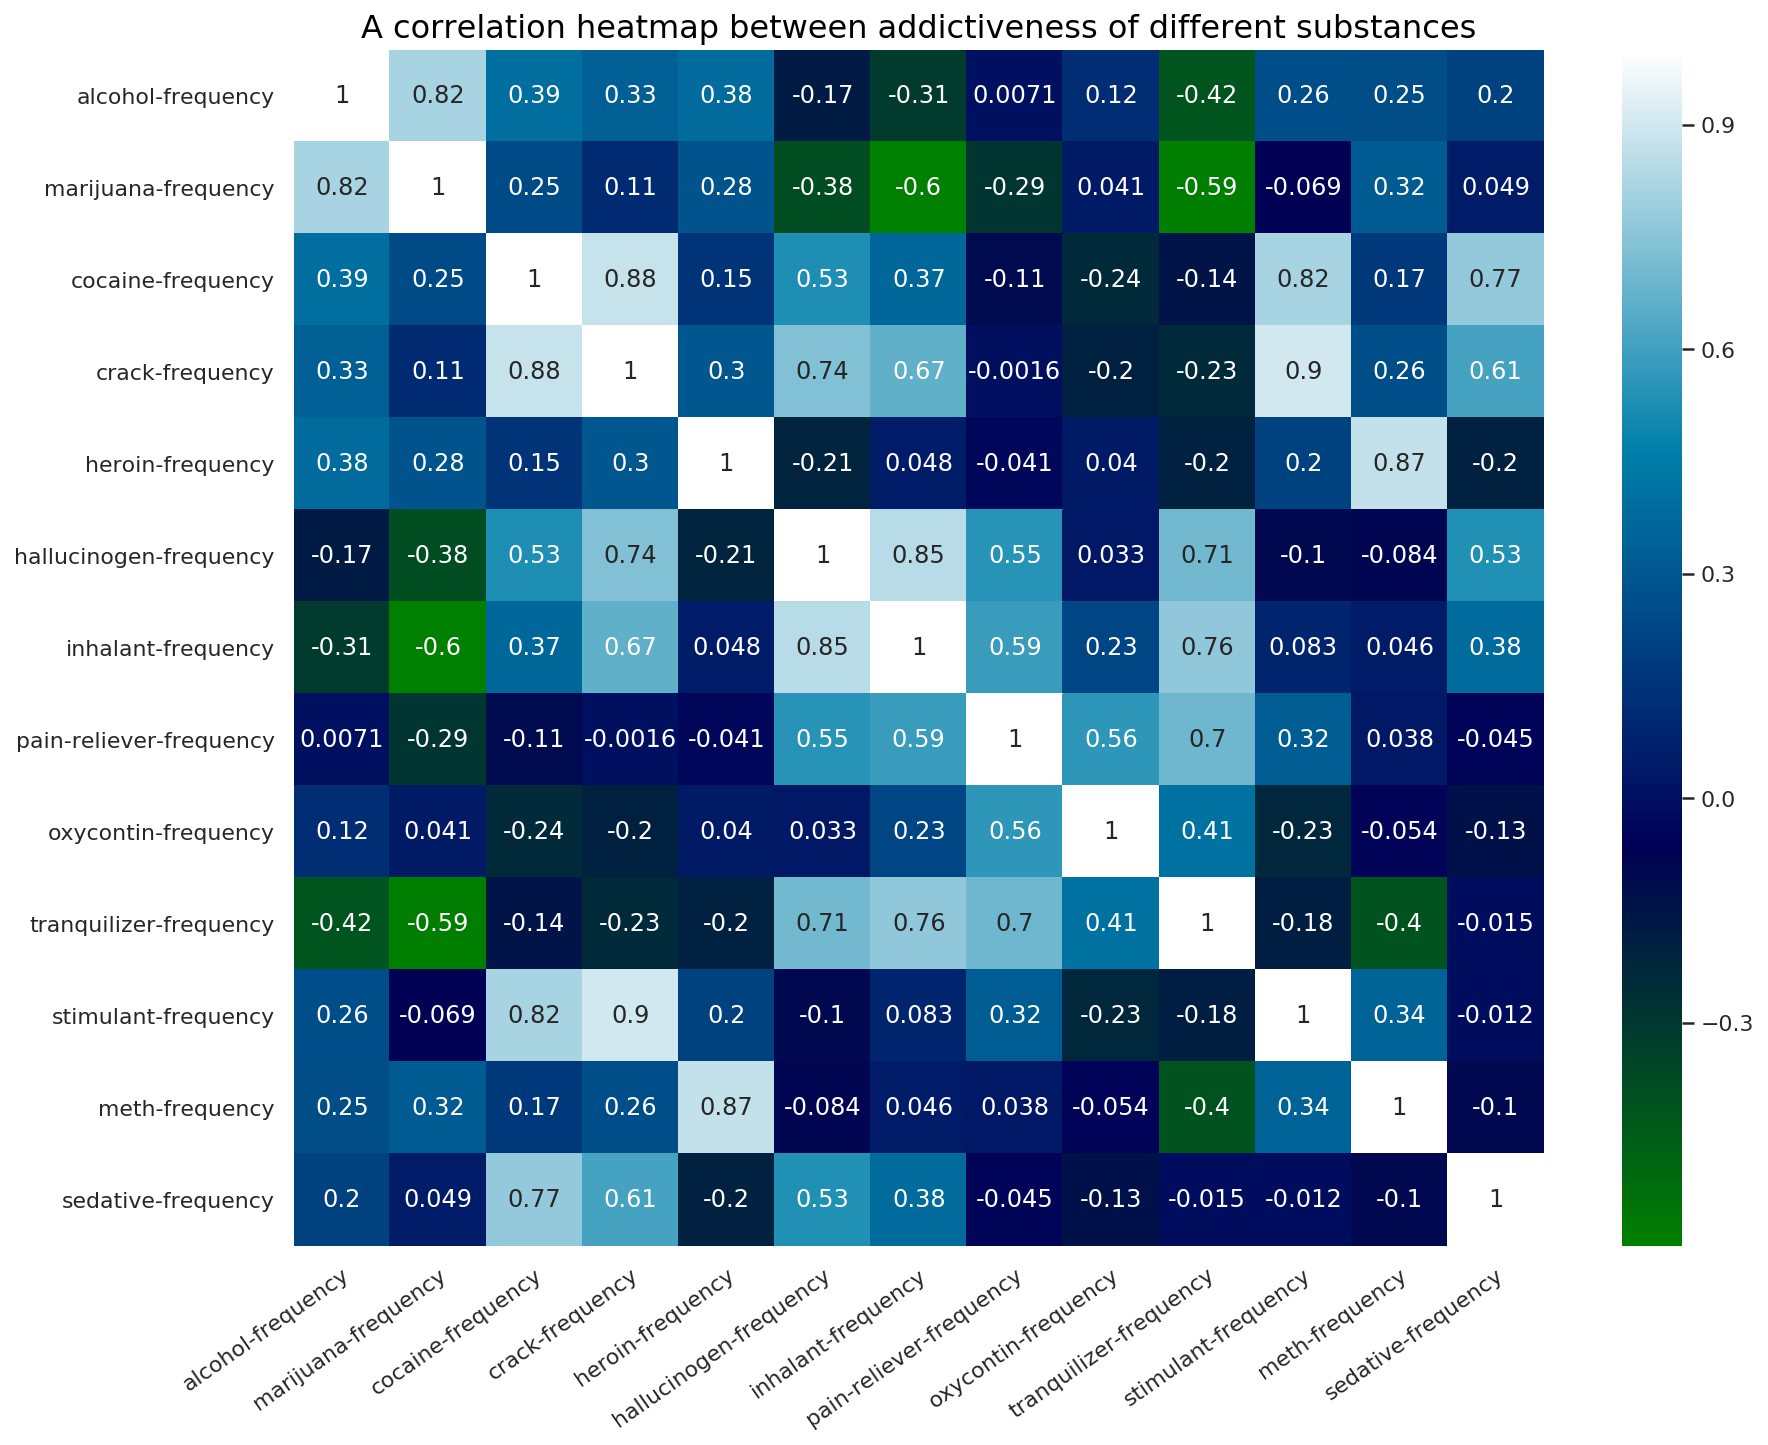

In [35]:
plt.figure(figsize = (14,11))
sns.heatmap(drugs.loc[:,'alcohol-frequency'::2].corr(), cmap='ocean',annot=True)
plt.title('A correlation heatmap between addictiveness of different substances',fontsize=16,color='black')
plt.xticks(rotation=35, ha='right', rotation_mode='anchor');

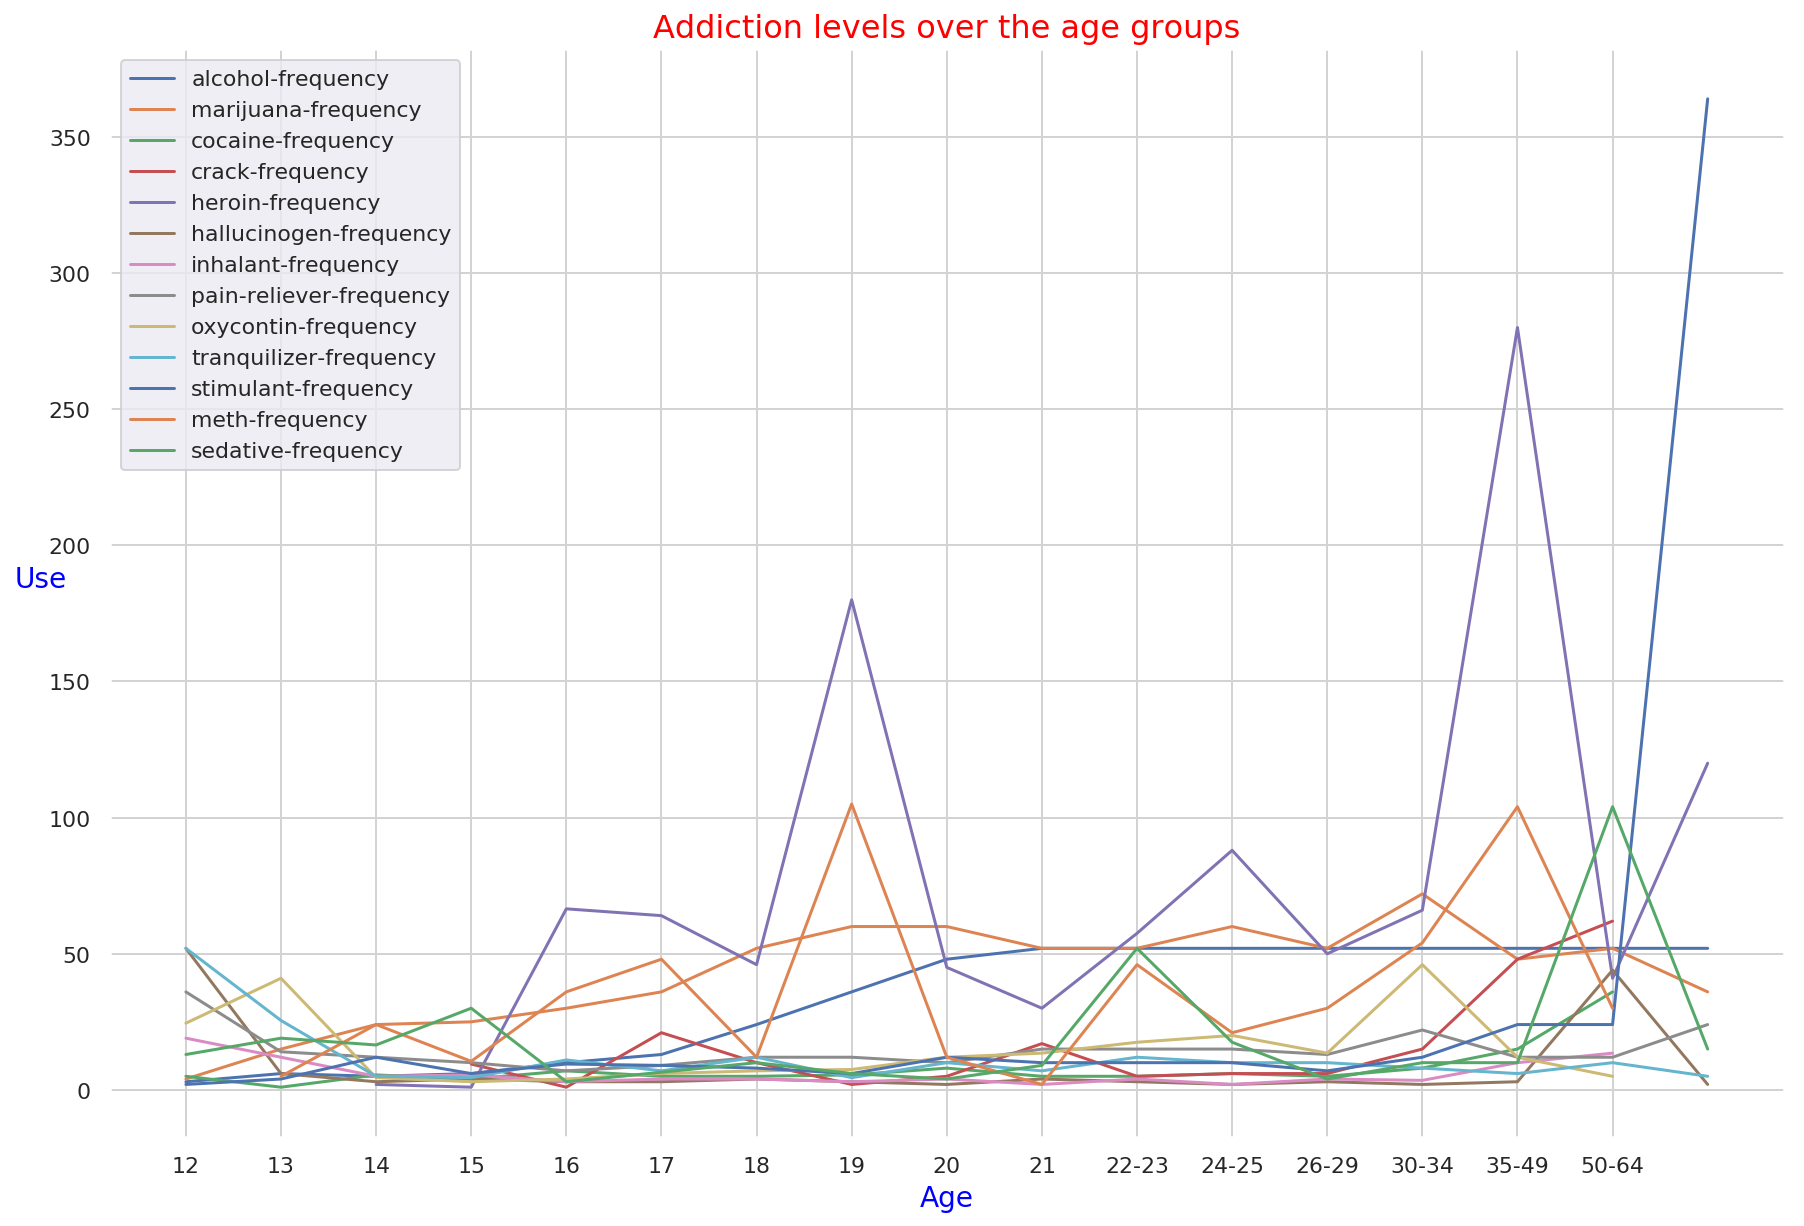

In [36]:
drugs.loc[:,'alcohol-frequency':'sedative-frequency':2].plot.line(figsize=(15,10),lw=1.5)
ax=plt.gca()
ax.set_facecolor('xkcd:white')
ax.grid(color='lightgray')
plt.xlabel('Age',fontsize=14,color='Blue')
plt.ylabel('Use',rotation=0,fontsize=14,color='Blue')
plt.title('Addiction levels over the age groups',fontsize=16,color='Red')
plt.legend()
plt.xticks(np.arange(16),np.array(drugs['age']));

### Gateway Drug Theory
Marijuana, alcohol, nicotine and other gateway drugs boost dopamine levels, which increases pleasure. The dopamine boost caused by gateway drugs during adolescence makes the brain release less dopamine during adulthood. This leads people to seek harder drugs that cause more dramatic dopamine releases, according to the gateway drug theory.  

In short, we can try to isolate gateway drugs use and harder stuff usage.

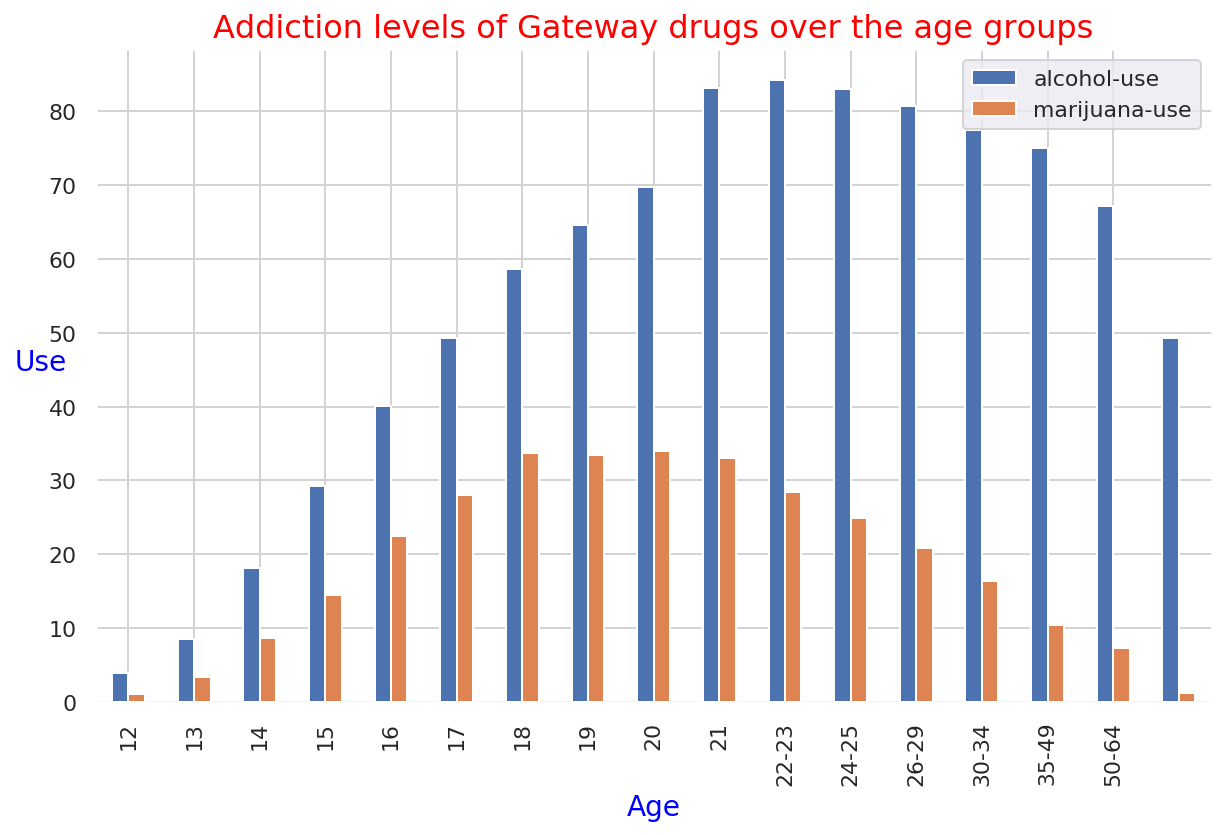

In [37]:
drugs[['alcohol-use','marijuana-use']].plot.bar(figsize=(10,6))
ax=plt.gca()
ax.set_facecolor('xkcd:white')
ax.grid(color='lightgray')
plt.xlabel('Age',fontsize=14,color='Blue')
plt.ylabel('Use',rotation=0,fontsize=14,color='Blue')
plt.title('Addiction levels of Gateway drugs over the age groups',fontsize=16,color='Red')
plt.legend()
plt.xticks(np.arange(16),np.array(drugs['age']));

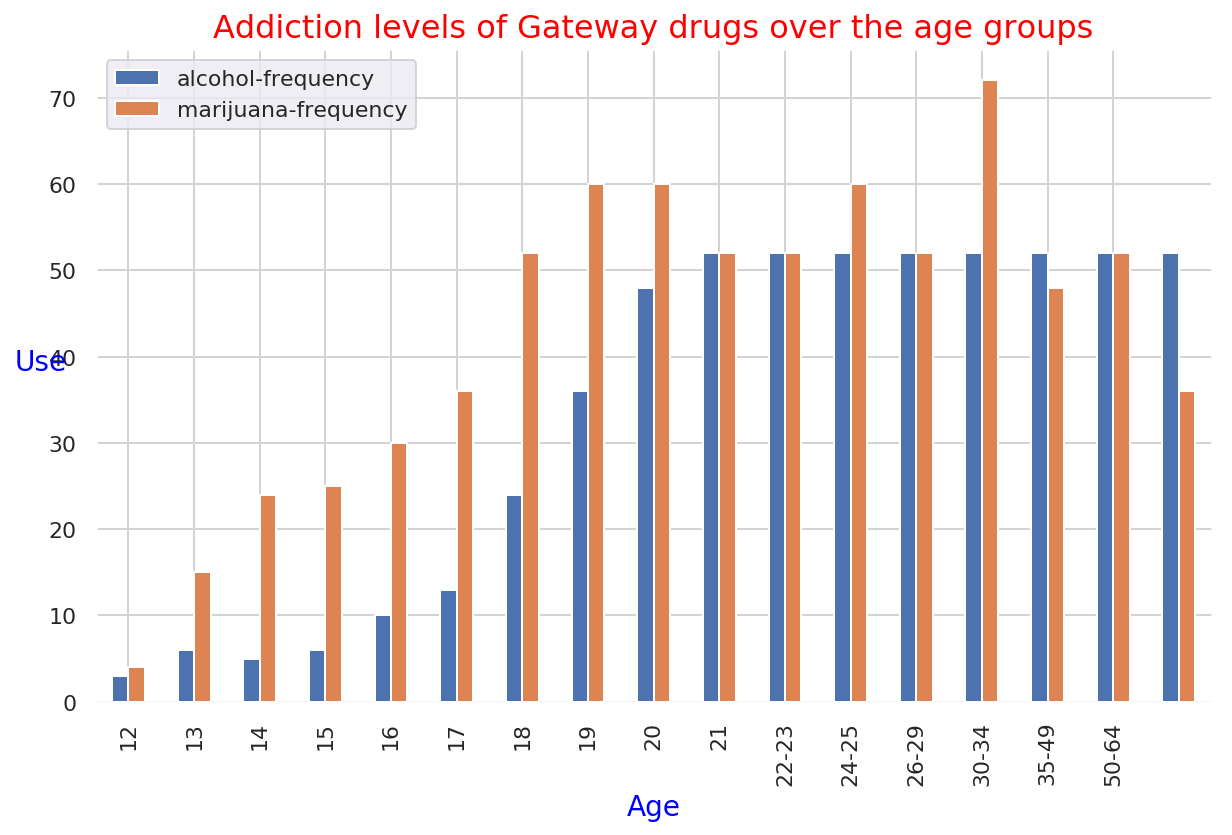

In [93]:
drugs[['alcohol-frequency','marijuana-frequency']].plot.bar(figsize=(10,6))
ax=plt.gca()
ax.set_facecolor('xkcd:white')
ax.grid(color='lightgray')
plt.xlabel('Age',fontsize=14,color='Blue')
plt.ylabel('Use',rotation=0,fontsize=14,color='Blue')
plt.title('Addiction levels of Gateway drugs over the age groups',fontsize=16,color='Red')
plt.legend()
plt.xticks(np.arange(16),np.array(drugs['age']));

### Dealing with teen drug use  
We might want to look at the drugs associated with teen consumption, in an attempt to lock them down and get them back on track - focusing on their studies instead of getting wasted.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [38]:
# Code
# Find your question and then determine which test to use
# Write out the answer/conclusion

Going by gateway drug theory, it is possible that the use of easily obtained, innocuous drugtypes like alcohol could lead on to consumption of increasingly heavier stuff.  
Marijuana meanwhile is the step up from tobacco/cigarette use.  
I want to explore if there is any relationship from one such gateway drug to a heavier drug, such as cocaine.  

H0: Marijuana use leads to Cocaine use  
H1: Cocaine use and Marijuana use is independant of each other.

In [98]:
result = stats.chi2_contingency([list(drugs['marijuana-use']),list(drugs['cocaine-use'])],correction=False)
result

(5.0035195653019935,
 0.9957357834610476,
 16,
 array([[ 1.07621968,  3.13897407,  7.89227767, 13.45274603, 21.07596878,
         26.90549205, 33.09375523, 33.63186507, 34.8874547 , 33.90091999,
         29.50635629, 25.91895735, 21.52439364, 16.5917201 , 10.67251185,
          7.35416783,  1.07621968],
        [ 0.12378032,  0.36102593,  0.90772233,  1.54725397,  2.42403122,
          3.09450795,  3.80624477,  3.86813493,  4.0125453 ,  3.89908001,
          3.39364371,  2.98104265,  2.47560636,  1.9082799 ,  1.22748815,
          0.84583217,  0.12378032]]))

Chi^2 Value is 5.00  
P value is 0.9957  
Degree of Freedom is 16.  
  
P is not significant at p < 0.05.  
We can therefore reject the null hypothesis and conclude that from the dataset, Cocaine and Marijuane use is independant

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

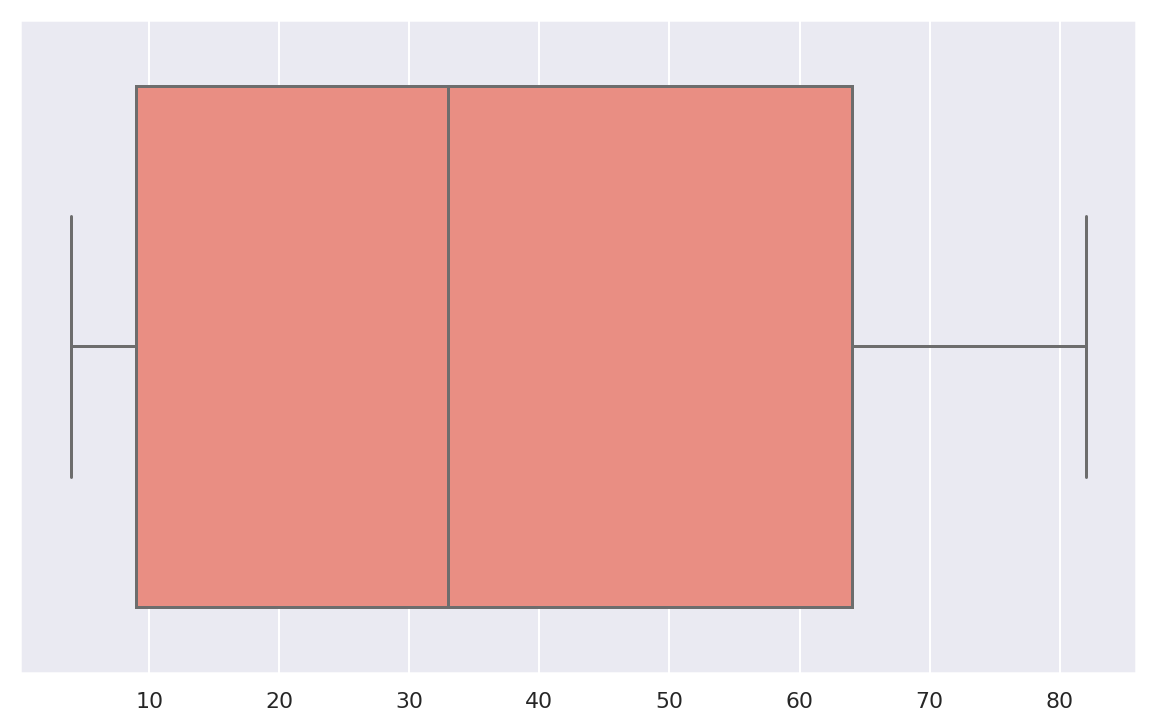

In [51]:
sns.boxplot(satscore[['Rate']],color='salmon');

In [40]:
satscore[['Rate']].describe()

,Rate
count,51.000000
mean,37.000000
std,27.550681
min,4.000000
25%,9.000000
50%,33.000000
75%,64.000000
max,82.000000


Outliers are defined as datapoints being beyond 1.5X inter-quartile range from the 1st and 3rd quartiles.  
To find that, we must first find the upper and lower limits of 'Rate' data.

In [53]:
limitrange=(1.5 * (64-9))
lowerlimit = (9-82.5)
upperlimit = (64+82.5)
print('Outliers for Rate dataset will be outside the ranges of :',lowerlimit,'to',upperlimit)

Outliers for Rate dataset will be outside the ranges of : -73.5 to 146.5


### As there are no datapoints beyond the lower and upper limits, we can deduce that, by definition, there are no outlier datapoints

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


#### Difference:  

- Spearman's coefficient measures the rank order of the points. It does not care exactly where they are.

- Pearson's coefficient measures the linear relationship between the two, i.e. how well a straight line describes the relationship between them.  

#### Formula:  

- The coefficient is calculated by taking 6 * the sum of differences between the two variable, divided by the number of variable pairs, squared, minused 1, multiplied by the number of variable pairs again. Finally we substract this from 1.

In [54]:
satscore[['Verbal','Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.909413
Math,0.909413,1.000000


In [55]:
satscore[['Verbal','Math']].corr(method='pearson')

,Verbal,Math
Verbal,1.000000,0.899909
Math,0.899909,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [71]:
satscore['Percentile']=satscore['Rate'].apply(lambda x: stats.percentileofscore(satscore['Rate'],x))
satscore.loc[satscore['State']== 'CA','Percentile']


23    55.882353
Name: Percentile, dtype: float64

Percentile is the conversion of all the values to a ranking out of 100.  
In this example, CAlifornia is the 55.9 percentile, based on Rate.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Text(0.5, 1.0, 'Histogram of alcohol usage')

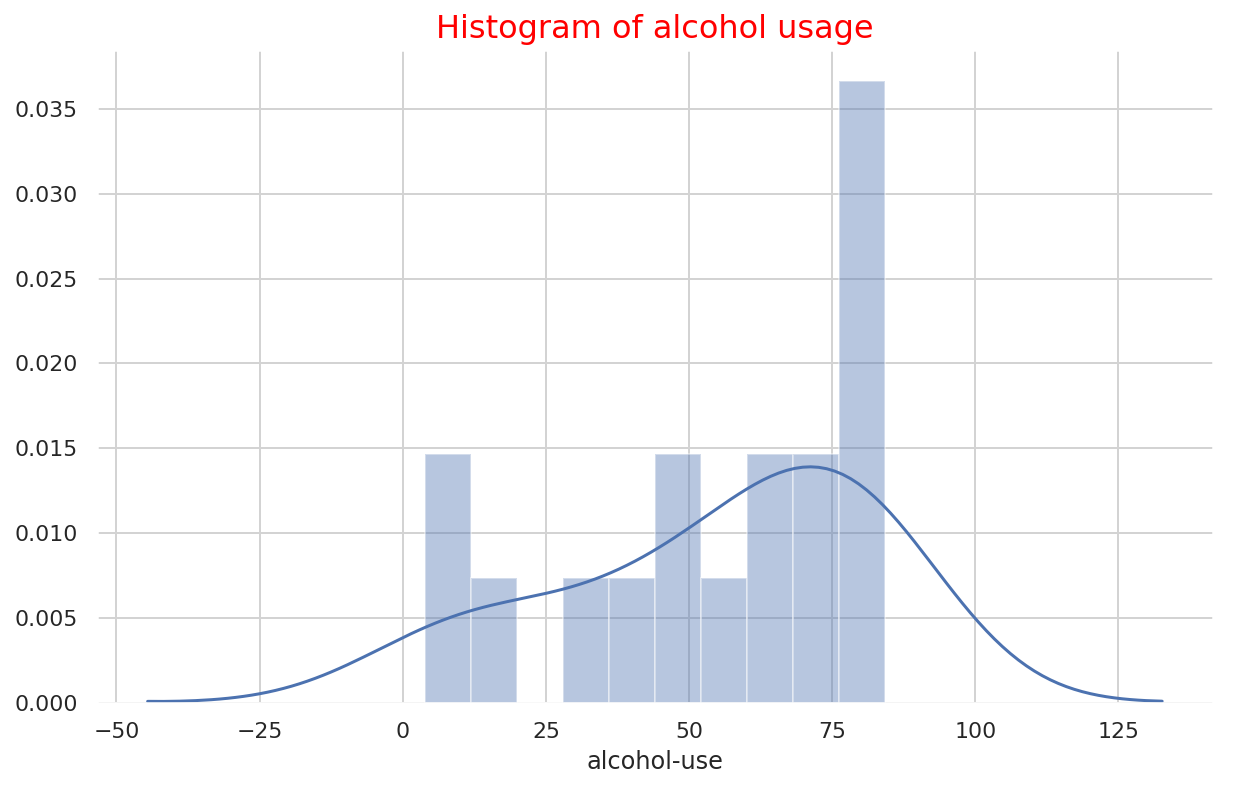

In [85]:
sns.distplot(drugs['alcohol-use'],bins=10)
ax=plt.gca()
ax.set_facecolor('xkcd:white')
ax.grid(color='lightgray')
plt.title('Histogram of alcohol usage',fontsize=16,color='Red')

In [87]:
drugs['alcohol-use percentile']=drugs['alcohol-use'].apply(lambda x: stats.percentileofscore(drugs['alcohol-use'],x))


Text(0.5, 1.0, 'Histogram of alcohol usage by percentile')

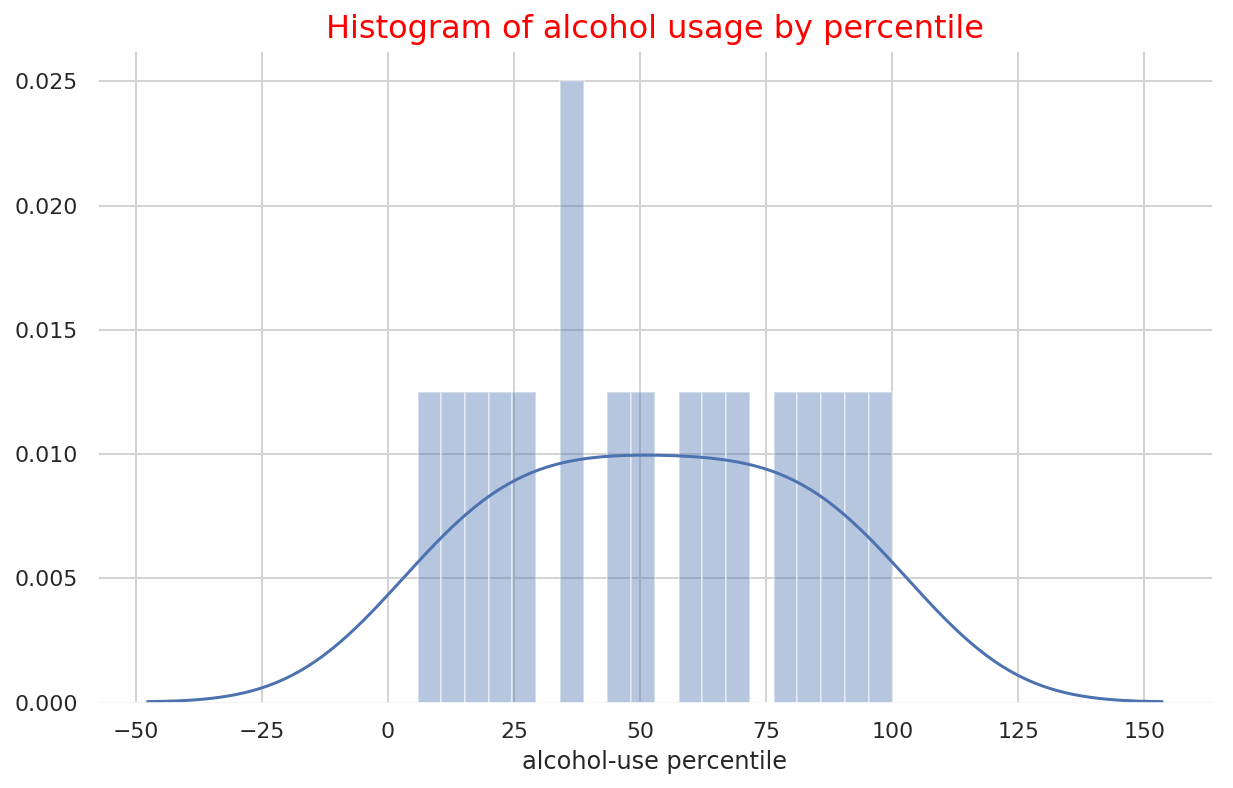

In [92]:
sns.distplot(drugs['alcohol-use percentile'],bins=20)
ax=plt.gca()
ax.set_facecolor('xkcd:white')
ax.grid(color='lightgray')
plt.title('Histogram of alcohol usage by percentile',fontsize=16,color='Red')